# Problem Statement



***Context and Importance:***

The wine industry is a multi-billion dollar global market, where both connoisseurs and casual drinkers rely heavily on wine reviews to make informed purchasing decisions. These reviews often encompass various aspects such as the wine's country of origin, variety, price, and tasting notes. Understanding the patterns and factors that influence wine ratings and prices can provide valuable insights for producers, retailers, and consumers alike.

***Objective:***

This analysis aims to explore and analyze a dataset of wine reviews to uncover key patterns and trends. Specifically, the objectives are to:

Identify the main factors influencing wine ratings and prices.
Examine the differences in wine characteristics across different countries and varieties.
Predict wine ratings based on available features using regression models.

***Research Questions:***

What are the primary factors that affect the price of wine?
Is there a significant difference in the average price of red wines compared to white wines?
How do wine ratings differ across different countries and varieties?

***Scope:***

The analysis will include data cleaning and preprocessing steps to prepare the dataset for in-depth analysis. It will employ descriptive statistics, visualizations, hypothesis testing, confidence intervals, and regression analysis to address the research questions. The focus will be on the dataset available from Kaggle, which includes detailed wine reviews.

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import ttest_ind
import plotly.express as px
import statsmodels.api as sm
#import warnings
#warnings.filterwarnings("ignore")

# Description of the dataset

**Source of dataset:** https://www.kaggle.com/datasets/zynicide/wine-reviews

**Number of observations**: The dataset contains 130,000 wine reviews.

**Number of variables per observation**: Each observation includes 14 variables.



In [2]:
df = pd.read_csv('winemag-data-130k-v2.csv')
df.sample(5)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
58987,58987,Argentina,Tropical aromas of lychee and banana come with...,NaN,88,14.0,Other,Cafayate,NaN,Michael Schachner,@wineschach,Nieto Senetiner 2015 Torrontés (Cafayate),Torrontés,Nieto Senetiner
41615,41615,Italy,Calcarole is an expensive and important Amaron...,Calcarole,89,120.0,Veneto,Amarone della Valpolicella Classico,NaN,NaN,NaN,Guerrieri Rizzardi 2003 Calcarole (Amarone de...,"Corvina, Rondinella, Molinara",Guerrieri Rizzardi
115083,115083,US,"Bright and airy on the nose, with aromas of le...",NaN,91,32.0,California,Santa Maria Valley,Central Coast,Matt Kettmann,@mattkettmann,Dierberg 2013 Chardonnay (Santa Maria Valley),Chardonnay,Dierberg
11721,11721,US,"Another of Borra's inventive blends, this one ...",Intuition Field Blend,90,22.0,California,Lodi,Central Valley,Virginie Boone,@vboone,Borra 2012 Intuition Field Blend White (Lodi),White Blend,Borra
111489,111489,US,This is Syrah co-fermented with Viognier comin...,NaN,92,45.0,Washington,Columbia Valley (WA),Columbia Valley,Sean P. Sullivan,@wawinereport,JM Cellars 2012 Syrah (Columbia Valley (WA)),Syrah,JM Cellars


**Meaning and type of the different variables**

In [3]:
df.dtypes

Unnamed: 0                 int64
country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
dtype: object

### Original Used Columns

| Column          | Description                                                            | Data Type       |
|-----------------|------------------------------------------------------------------------|-----------------|
| country         | The country where the wine is produced.                                | Object (String) |
| description     | A textual description of the wine's characteristics.                   | Object (String) |
| designation     | The name of the wine given by the winery.                              | Object (String) |
| points          | The wine rating on a scale from 0 to 100.                              | Integer         |
| price           | The price of the wine bottle in dollars.                               | Float           |
| province        | The province or state where the wine is produced.                      | Object (String) |
| region_1        | The primary wine region where the wine is produced.                    | Object (String) |
| region_2        | The secondary wine region where the wine is produced.                  | Object (String) |
| title           | The full name of the wine, including the vintage and other identifying information. | Object (String) |
| variety         | The type of grape used to produce the wine (e.g., Pinot Noir, Chardonnay). | Object (String) |
| winery          | The name of the winery that produced the wine.                         | Object (String) |

### Created Column

| Column          | Description            | Data Type |
|-----------------|------------------------------------------------------------------------|-----------------|
| is_outlier      | Wine outside lower and upper bounds                                    | bool            |
| price_category  | We have defined five different price category                          | category        |
| vintage         | The year of production                                                 | Integer         |
| review_length   | The lenght of the review                                               | Integer         |
| wine_type       | Red or With wine                                                       | Object (String) |


### Dropped Columns

| Column                 | Description                                                          | Data Type       |
|------------------------|----------------------------------------------------------------------|-----------------|
| Unnamed: 0             | An index column, possibly used to maintain the original order of the data. | Integer         |
| taster_name            | The name of the person who tasted and reviewed the wine.              | Object (String) |
| taster_twitter_handle  | The Twitter handle of the taster.                                     | Object (String) |


# Data Cleaning

The column ‘Unnamed: 0’ is not needed as it is the line number and we already have that.

We find that the columns ‘taster_name’ and ‘taster_twitter_handle’ are also not useful for our project.

We proceed to delete these columns from the dataframe:

In [4]:
df.drop(columns=['Unnamed: 0', 'taster_name', 'taster_twitter_handle'], inplace=True)

### Drop duplicates

as first we check for duplicates and delete them

In [5]:
duplicated = df.duplicated().sum()
print(f"Total duplicate: {duplicated}")
df.drop_duplicates(inplace=True)
duplicated = df.duplicated().sum()
print(f"Total duplicate: {duplicated}")

Total duplicate: 9983
Total duplicate: 0


### Data Quality Assessment

Display of missing values, unique values and duplicates of each column

In [6]:
# Initialize a list to store the data
data_quality = []

# Calculate the metrics for each column and store them in the list
for column in df.columns:
    nan_count = df[column].isna().sum()
    unique_count = df[column].nunique()
    total_entries = df.shape[0]
    duplicates = total_entries - unique_count - nan_count
    
    data_quality.append({
        'Column': column,
        'Missing Values': nan_count,
        'Unique Values': unique_count,
        'Duplicates': duplicates
    })

# Create a DataFrame from the list
data_quality_df = pd.DataFrame(data_quality)

data_quality_df

,Column,Missing Values,Unique Values,Duplicates
0,country,59,43,119886
1,description,0,119955,33
2,designation,34545,37979,47464
3,points,0,21,119967
4,price,8395,390,111203
5,province,59,425,119504
6,region_1,19560,1229,99199
7,region_2,73219,17,46752
8,title,0,118840,1148
9,variety,1,707,119280


the columns that need to be arranged are ‘country’, ‘designation’, ‘price’, ‘province’, 'region_1', “region_2” and “variety”.

I also have to check ‘description’ as it should be unique for each wine

### Country column analysis

Filtering the DataFrame to show only rows where 'country' has NaN values

In [7]:
# Filter the DataFrame to show only rows where 'country' has NaN values
rows_with_nan = df[df['country'].isna()]
rows_with_nan.head(10)

,country,description,designation,points,price,province,region_1,region_2,title,variety,winery
913,NaN,"Amber in color, this wine has aromas of peach ...",Asureti Valley,87,30.0,NaN,NaN,NaN,Gotsa Family Wines 2014 Asureti Valley Chinuri,Chinuri,Gotsa Family Wines
3131,NaN,"Soft, fruity and juicy, this is a pleasant, si...",Partager,83,NaN,NaN,NaN,NaN,Barton & Guestier NV Partager Red,Red Blend,Barton & Guestier
4243,NaN,"Violet-red in color, this semisweet wine has a...",Red Naturally Semi-Sweet,88,18.0,NaN,NaN,NaN,Kakhetia Traditional Winemaking 2012 Red Natur...,Ojaleshi,Kakhetia Traditional Winemaking
9509,NaN,This mouthwatering blend starts with a nose of...,Theopetra Malagouzia-Assyrtiko,92,28.0,NaN,NaN,NaN,Tsililis 2015 Theopetra Malagouzia-Assyrtiko W...,White Blend,Tsililis
9750,NaN,This orange-style wine has a cloudy yellow-gol...,Orange Nikolaevo Vineyard,89,28.0,NaN,NaN,NaN,Ross-idi 2015 Orange Nikolaevo Vineyard Chardo...,Chardonnay,Ross-idi
11150,NaN,"A blend of 85% Melnik, 10% Grenache Noir and 5...",NaN,89,20.0,NaN,NaN,NaN,Orbelus 2013 Melnik,Melnik,Orbelus
11348,NaN,"Light and fruity, this is a wine that has some...",Partager,82,NaN,NaN,NaN,NaN,Barton & Guestier NV Partager White,White Blend,Barton & Guestier
14030,NaN,"This Furmint, grown in marl soils, has aromas ...",Márga,88,25.0,NaN,NaN,NaN,St. Donat 2013 Márga White,White Blend,St. Donat
16000,NaN,"Jumpy, jammy aromas of foxy black fruits are s...",Valle de los Manantiales Vineyard,86,40.0,NaN,NaN,NaN,Familia Deicas 2015 Valle de los Manantiales V...,Tannat,Familia Deicas
16749,NaN,Winemaker: Bartho Eksteen. This wooded Sauvy s...,Cape Winemakers Guild Vloekskoot Wooded,91,NaN,NaN,NaN,NaN,Bartho Eksteen 2016 Cape Winemakers Guild Vloe...,Sauvignon Blanc,Bartho Eksteen


59 lines are missing the country, province and region, so we have no idea where the wine comes from.

As these are 59 lines out of 111538, we decide to delete them.

In [8]:
df = df.dropna(subset=["country"])

### Description column analysis

Above we can see that the column "description" has 33 duplicate, a description is something unique, we must investigate

now i will display some duplicate wine to understand better

In [9]:
# Check for duplicates in the 'description' column
duplicate_descriptions = df[df.duplicated(subset='description', keep=False)]

# Display the duplicate 
#duplicate_descriptions_full = duplicate_descriptions
#duplicate_descriptions_full

duplicate_example = duplicate_descriptions[duplicate_descriptions['description'] == duplicate_descriptions.iloc[0]['description']]
duplicate_example_full = duplicate_example.head(5)

duplicate_example_full

,country,description,designation,points,price,province,region_1,region_2,title,variety,winery
2159,Italy,"Easygoing and enjoyable, this has aromas of ma...",NaN,84,15.0,Central Italy,Montepulciano d'Abruzzo,NaN,Valori 2014 Montepulciano d'Abruzzo,Montepulciano,Valori
22963,Italy,"Easygoing and enjoyable, this has aromas of ma...",NaN,86,NaN,Central Italy,Montepulciano d'Abruzzo,NaN,Quattro Mani 2015 Montepulciano d'Abruzzo,Montepulciano,Quattro Mani


in this case we can see that all columns have the same values.

we show several rows to see if this is the case for all duplicates

In [10]:
sorted_duplicates = duplicate_descriptions.sort_values(by='description')
sorted_duplicates

,country,description,designation,points,price,province,region_1,region_2,title,variety,winery
71853,France,90–92. Barrel sample. This is a solid and dens...,Barrel Sample,91,NaN,Bordeaux,Moulis-en-Médoc,NaN,Château Maucaillou 2012 Barrel Sample (Moulis...,Bordeaux-style Red Blend,Château Maucaillou
71851,France,90–92. Barrel sample. This is a solid and dens...,Barrel Sample,91,NaN,Bordeaux,Margaux,NaN,Château Pontac-Lynch 2012 Barrel Sample (Marg...,Bordeaux-style Red Blend,Château Pontac-Lynch
105559,France,92–94. Barrel sample. With so much spicy fruit...,Barrel Sample,93,NaN,Bordeaux,Saint-Julien,NaN,Château Gruaud Larose 2012 Barrel Sample (Sai...,Bordeaux-style Red Blend,Château Gruaud Larose
105554,France,92–94. Barrel sample. With so much spicy fruit...,Barrel Sample,93,NaN,Bordeaux,Pauillac,NaN,Château Grand-Puy-Lacoste 2012 Barrel Sample ...,Bordeaux-style Red Blend,Château Grand-Puy-Lacoste
73905,Italy,"Almost too much of a good thing, Passo is a th...",Passo,88,35.0,Veneto,Rosso del Veronese,NaN,Stefano Accordini 2007 Passo Red (Rosso del Ve...,Red Blend,Stefano Accordini
...,...,...,...,...,...,...,...,...,...,...,...
19269,Italy,This zesty red has pretty aromas that suggest ...,NaN,87,30.0,Tuscany,Rosso di Montalcino,NaN,Carpineto 2014 Rosso di Montalcino,Sangiovese,Carpineto
83693,US,Very ripe and forward in baked fruit or pie-fi...,NaN,84,45.0,California,Santa Ynez Valley,Central Coast,Sunstone 2006 Syrah (Santa Ynez Valley),Syrah,Sunstone
61484,US,Very ripe and forward in baked fruit or pie-fi...,Reserve,85,48.0,California,Santa Ynez Valley,Central Coast,Sunstone 2006 Reserve Syrah (Santa Ynez Valley),Syrah,Sunstone
31584,Italy,"Vibrant and spicy, this savory red delivers ar...",Costera,90,18.0,Sicily & Sardinia,Cannonau di Sardegna,NaN,Argiolas 2013 Costera (Cannonau di Sardegna),Red Blend,Argiolas


You can see that in these wines, although the description is the same, there are columns with different values, so they are not duplicates

### Handle NaN

***Columns with string data type***

We want to replace NaN value with 0 in the Price column

In [11]:
rows_with_nan = df[df['variety'].isna()]
rows_with_nan

,country,description,designation,points,price,province,region_1,region_2,title,variety,winery
86909,Chile,"A chalky, dusty mouthfeel nicely balances this...",NaN,88,17.0,Maipo Valley,NaN,NaN,Carmen 1999 (Maipo Valley),NaN,Carmen


In [12]:

df['variety'].fillna('Not-Available', inplace=True)

In [13]:
# Define the columns you want to check and replace NaN values
columns_to_check = ['designation', 'province', 'region_1', 'region_2', 'variety']

# Iterate over each column and replace NaN values with 'Not-available'
for column in columns_to_check:
    # Find the index of the row with NaN in the current column
    row_with_nan_index = df[df[column].isna()].index

    # Assign 'Not-available' to that row and column
    df.loc[row_with_nan_index, column] = 'Not-available'

***Price column***


It makes no sense to replace NaN in the price with 0, because in most statistics we would discard these rows. So we decide to delete these 8391 rows

In [14]:
nan_count = df['price'].isna().sum()
print("Before:")
print(f"total NaN in price: {nan_count}")

#df['price'] = df['price'].fillna(0).astype('float64')
df = df.dropna(subset=['price'])

nan_count = df['price'].isna().sum()
print("After:")
print(f"total NaN in price: {nan_count}")

Before:
total NaN in price: 8391
After:
total NaN in price: 0


### Level of noise in price

In this section, we aim to identify the level of noise within our dataset by detecting outliers in the price column. Outliers are extreme values that deviate significantly from the rest of the data and can potentially skew the analysis. By flagging these outliers, we can better understand the variability and quality of our data.

We can have noises in 'points' and 'price' columns:

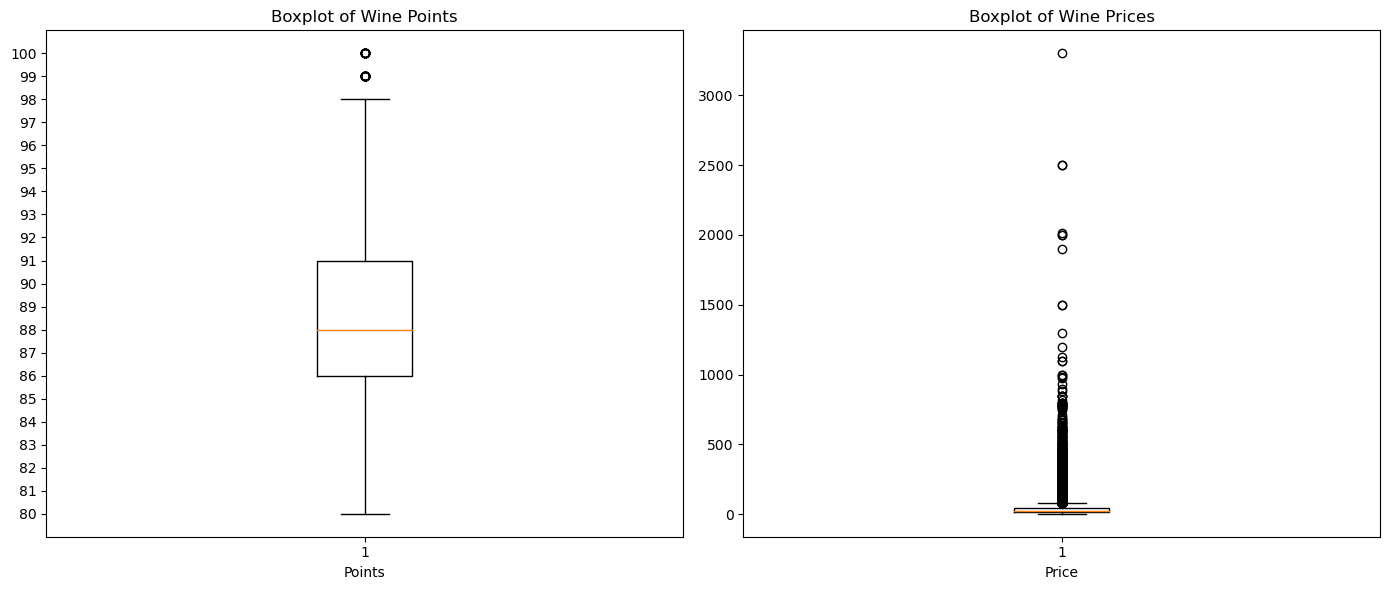

In [15]:
# Create boxplots for 'points' and 'price'
plt.figure(figsize=(14, 6))

# Boxplot for 'points'
plt.subplot(1, 2, 1)
plt.boxplot(df['points'])
plt.title('Boxplot of Wine Points')
plt.xlabel('Points')
plt.yticks(np.arange(80, 101, 1))

# Boxplot for 'price'
plt.subplot(1, 2, 2)
plt.boxplot(df['price'])
plt.title('Boxplot of Wine Prices')
plt.xlabel('Price')

plt.tight_layout()
plt.show()

From the boxplot of the points, we can see that we only have two Vaudores as noise,

The price boxplot doesn't tell us much in this visualisation, so let's plot it horizontally.

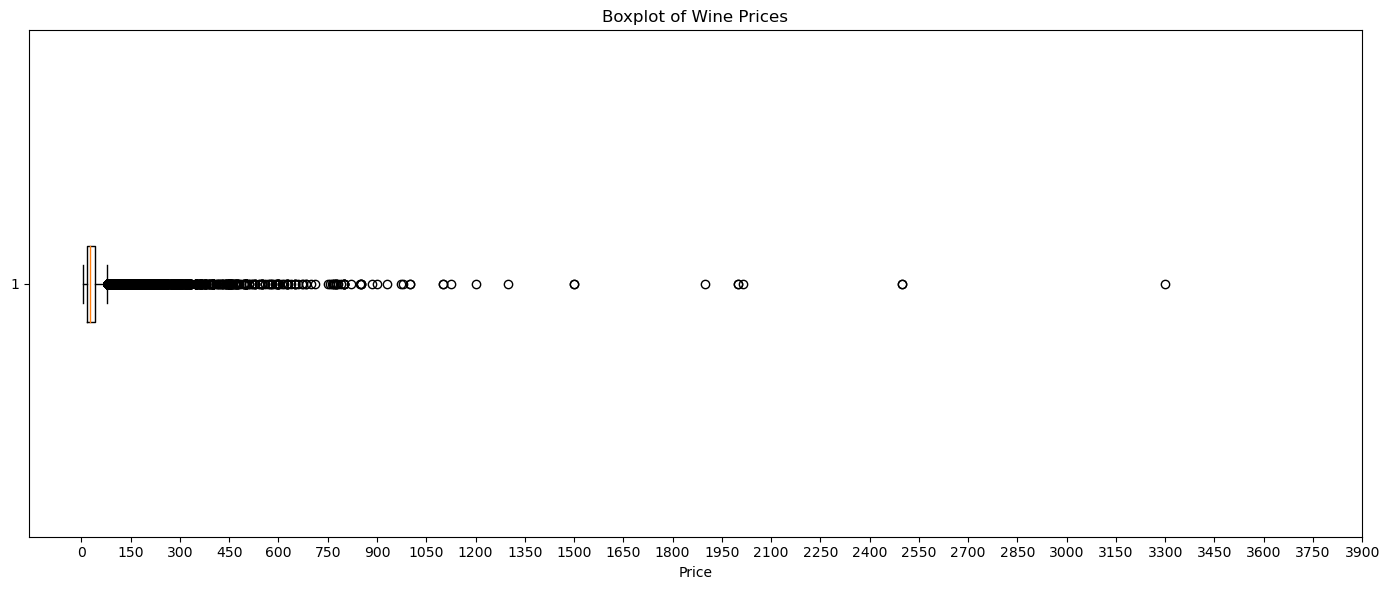

In [16]:
# Create boxplots for 'points' and 'price'
plt.figure(figsize=(14, 6))

# Boxplot for 'price'
#plt.subplot(1, 2, 2)
plt.boxplot(df['price'], vert=False)
plt.title('Boxplot of Wine Prices')
plt.xlabel('Price')
plt.xticks(np.arange(0, 4000, 150))

plt.tight_layout()
plt.show()

In [17]:
# Using IQR to identify outliers in the 'price' column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Flagging the outliers without removing them
df['is_outlier'] = (df['price'] < lower_bound) | (df['price'] > upper_bound)
outliers_df = df[df['is_outlier'] == True]

num_outliers = df['is_outlier'].sum()
total_observations = df.shape[0]

# Proportion of outliers
proportion_outliers = num_outliers / total_observations

print(f"Number of outlier wines: {num_outliers}")
print(f"Total number of observations: {total_observations}")
print(f"Proportion of outliers: {proportion_outliers:.2%}")



Number of outlier wines: 6869
Total number of observations: 111538
Proportion of outliers: 6.16%


### Level of noise in Points


In [18]:
# Using IQR to identify outliers in the 'price' column
Q1 = df['points'].quantile(0.25)
Q3 = df['points'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


# Proportion of outliers
proportion_outliers = num_outliers / total_observations

print(f"Number of outlier wines: {num_outliers}")
print(f"Total number of observations: {total_observations}")
print(f"Proportion of outliers: {proportion_outliers:.2%}")

Number of outlier wines: 6869
Total number of observations: 111538
Proportion of outliers: 6.16%


### Gestione outliners

In [19]:
df = df[df['price'] <= 1000]

# Preprocessing

with this dataset is interesting create new columns, like price category, wine vintage and lenght of description.

## Price Category column


we want to create some price category:

At first we plot the histogram of the price to have an idea of the distribution:

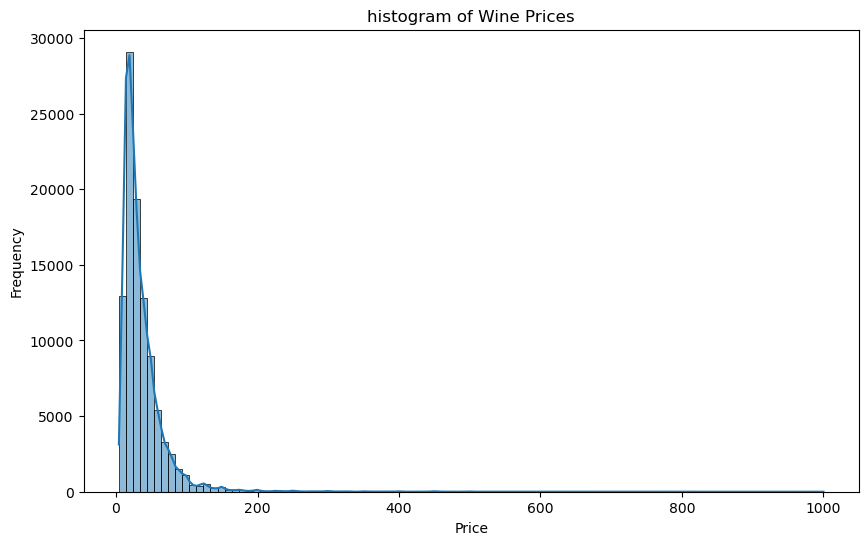

In [70]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=100, kde=True)
plt.title('histogram of Wine Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

As we can see, the plot of price is right-skewed, and we could also observe this by categorising the wines into a price category.

To analyse the distribution of wines in different price ranges, we categorise prices into 'Low', 'Medium', 'High', 'Very High', 'Premium'.

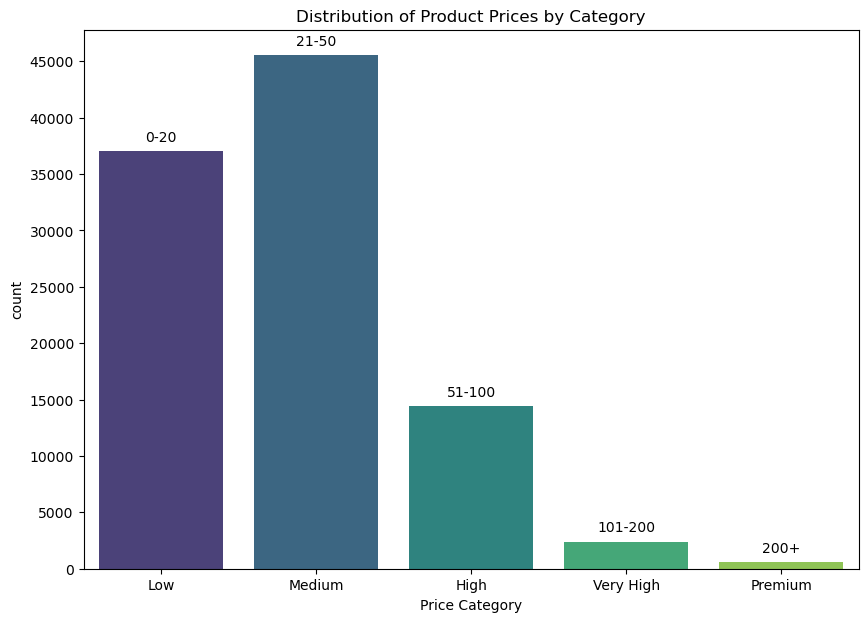

In [76]:
bins = [0, 20, 50, 100, 200, np.inf]
labels = ['Low', 'Medium', 'High', 'Very High', 'Premium']
df['price_category'] = pd.cut(df['price'], bins=bins, labels=labels)

# Plotting with seaborn
plt.figure(figsize=(10, 7))
palette = sns.color_palette("viridis", len(labels)) # Create a palette with a color for each category
ax = sns.countplot(data=df, x='price_category', palette=palette)
plt.title('Distribution of Product Prices by Category')
plt.xlabel('Price Category')
plt.ylabel('count')
plt.yticks(np.arange(0, 50000, 5000))

# Annotate bars with price range
price_ranges = ['0-20', '21-50', '51-100', '101-200', '200+']
for p, label, price_range in zip(ax.patches, labels, price_ranges):
    ax.annotate(f'{price_range}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

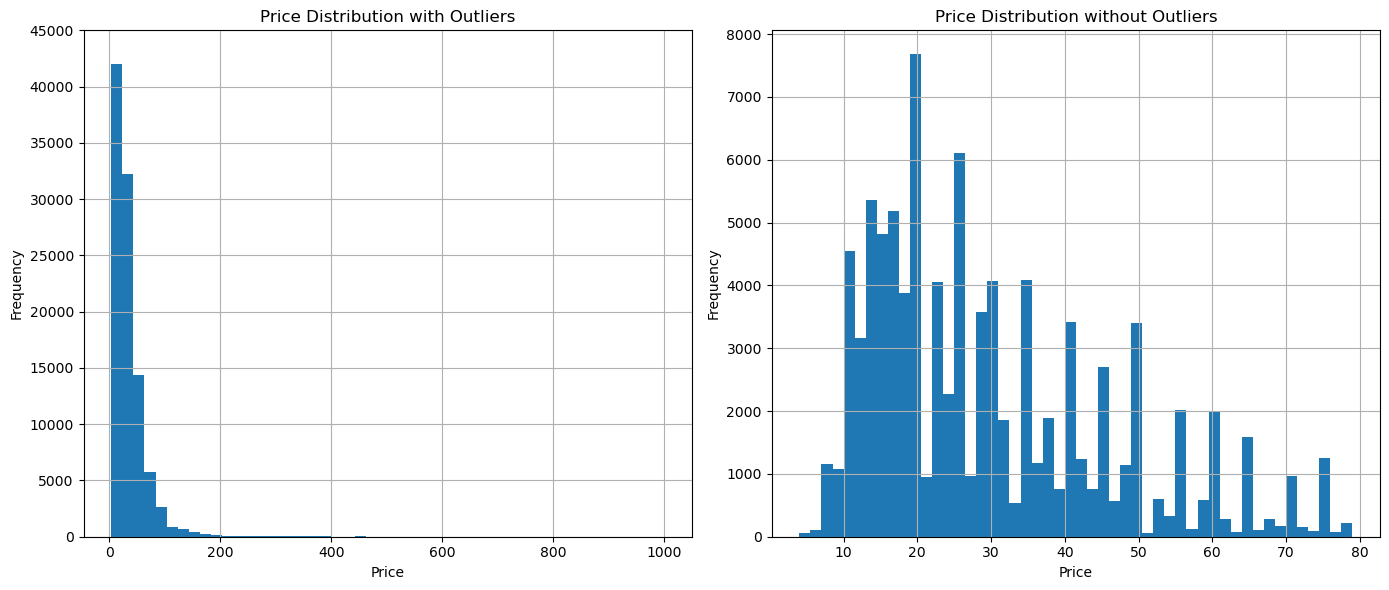

In [77]:
# Create a boolean mask for non-outliers
non_outliers_mask = df['is_outlier'] == False
df_without_outliers = df[non_outliers_mask]

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
df['price'].hist(bins=50)
plt.title('Price Distribution with Outliers')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.yticks(np.arange(0, 50000, 5000))

# Histogram of prices without outliers
plt.subplot(1, 2, 2)
df_without_outliers['price'].hist(bins=50)
plt.title('Price Distribution without Outliers')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.yticks(np.arange(0, 9000, 1000))

plt.tight_layout()
plt.show()

## Wine Vintage column

since the ‘description’ and ‘title’ columns contain the vintage of the wine, it is interesting to create a 'vintage' column to do some analysis

In [23]:
import re
# Function to extract the vintage year from the title or description
def extract_vintage(row):
    # Try to find the year in the title first
    title_match = re.search(r'\b(19|20)\d{2}\b', row['title'])
    if title_match:
        return int(title_match.group(0))
    # If not found in title, try to find the year in the description02
    description_match = re.search(r'\b(19|20)\d{2}\b', row['description'])
    if description_match:
        return int(description_match.group(0))
    # If not found in either, return None
    return None

# Apply the function to the dataframe to create the vintage column
df['vintage'] = df.apply(extract_vintage, axis=1)

# Check that the column has no Nan value
nan_counts = df.isna().sum()
nan_counts
print("Number of NaN: ", nan_count)

# Converting the vintage column to integer type to remove the .0
df['vintage'] = df['vintage'].astype('Int64')

#new column show
df[['title', 'description', 'vintage']].head()


Number of NaN:  0


,title,description,vintage
1,Quinta dos Avidagos 2011 Avidagos Red (Douro),"This is ripe and fruity, a wine that is smooth...",2011
2,Rainstorm 2013 Pinot Gris (Willamette Valley),"Tart and snappy, the flavors of lime flesh and...",2013
3,St. Julian 2013 Reserve Late Harvest Riesling ...,"Pineapple rind, lemon pith and orange blossom ...",2013
4,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,"Much like the regular bottling from 2012, this...",2012
5,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Blackberry and raspberry aromas show a typical...,2011


## Description length column

The length of the wine description might correlate with the wine rating, so we create a new variable to capture this information.

In [78]:
def calculate_review_length(description):
    if pd.notnull(description):
        return len(description)
    else:
        return 0

df['review_length'] = df['description'].apply(calculate_review_length)

#new column show
df[['description', 'review_length']].head()

,description,review_length
1,"This is ripe and fruity, a wine that is smooth...",227
2,"Tart and snappy, the flavors of lime flesh and...",186
3,"Pineapple rind, lemon pith and orange blossom ...",199
4,"Much like the regular bottling from 2012, this...",249
7,This dry and restrained wine offers spice in p...,122


# Data Exploration

## Histogram of Wine Points

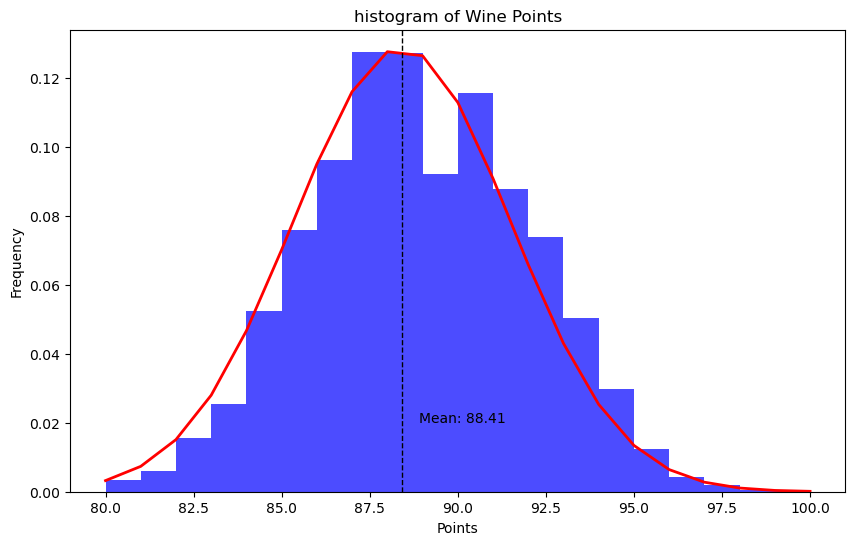

In [25]:
# 'points' is our column of interest
mean_points = df['points'].mean()
std_points = df['points'].std()

# Generate values for the normal distribution curve
normal_dist = stats.norm.pdf(sorted(df['points']), mean_points, std_points)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['points'], bins=20, density=True, color='blue', alpha=0.7)
plt.plot(sorted(df['points']), normal_dist, color='red', linewidth=2)
plt.title('histogram of Wine Points')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.axvline(mean_points, color='k', linestyle='dashed', linewidth=1)
plt.text(mean_points + 0.5, 0.02, f'Mean: {mean_points:.2f}', rotation=0)
plt.show()

## Review Lenght Distribution

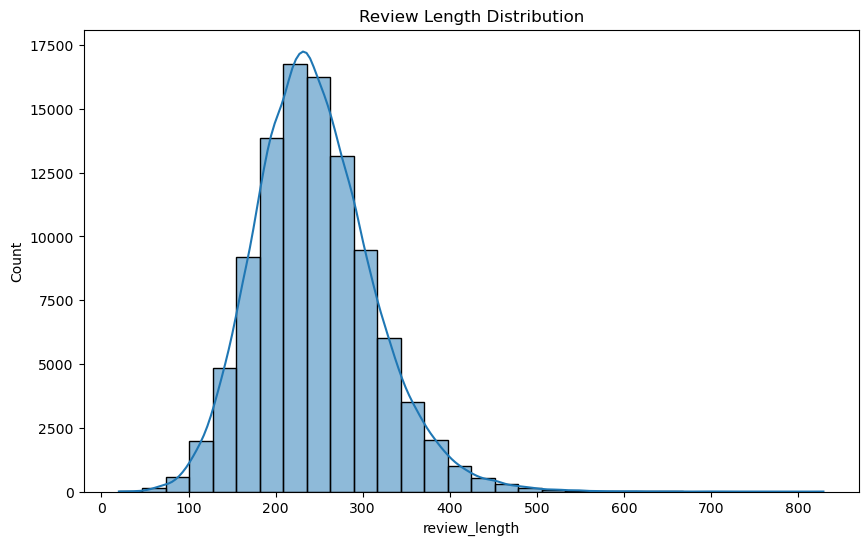

In [79]:
# Plot the hisogram
plt.figure(figsize=(10, 6))
sns.histplot(df['review_length'], bins=30, kde=True)
plt.title('Review Length Distribution')
plt.show()

## Animated World Wine Distribution Map

In [81]:
# Count the number of wines per country and vintage year
country_vintage_counts = df.groupby(['country', 'vintage']).size().reset_index(name='count')

# Sort the DataFrame by 'vintage' and 'country'
country_vintage_counts = country_vintage_counts.sort_values(by=['vintage', 'country'])

# Calculate the cumulative count of wines for each country
country_vintage_counts['cumulative_count'] = country_vintage_counts.groupby('country')['count'].cumsum()

# Create a complete range of years for each country
all_years = pd.DataFrame({'vintage': range(country_vintage_counts['vintage'].min(), country_vintage_counts['vintage'].max() + 1)})
country_list = country_vintage_counts['country'].unique()

# Merge the original data with the complete range of years
full_data = pd.DataFrame()
for country in country_list:
    country_data = country_vintage_counts[country_vintage_counts['country'] == country]
    country_data = all_years.merge(country_data, on='vintage', how='left')
    country_data['country'] = country
    country_data['cumulative_count'] = country_data['cumulative_count'].fillna(method='ffill').fillna(0)
    full_data = pd.concat([full_data, country_data], ignore_index=True)

# Generate the animated world map with cumulative wine counts
fig = px.choropleth(full_data,
                    locations="country",
                    locationmode='country names',
                    color="cumulative_count",
                    hover_name="country",
                    animation_frame="vintage",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="World Wine Distribution Over Time (Cumulative)")
fig.update_layout(width=1200, height=600)
fig.show()


## US wine distribution per state

In [28]:
# Filter the DataFrame to include only rows where the country is 'US'
us_wine_data = df[df['country'] == 'US']

# Filter the DataFrame to include only rows where the country is 'US' (repeated, this can be removed as it is redundant)
us_wine_data = df[df['country'] == 'US']

# Count the number of wines per state (province)
state_wine_counts = us_wine_data['province'].value_counts().reset_index()
state_wine_counts.columns = ['province', 'count']

# Correct list of US state abbreviations
state_abbreviations = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA',
    'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT',
    'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM',
    'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD',
    'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

# Convert state names to abbreviations
state_wine_counts['province'] = state_wine_counts['province'].map(state_abbreviations)

# Remove any NaN values that may have been introduced
state_wine_counts = state_wine_counts.dropna()

# Generate the map
fig = px.choropleth(state_wine_counts,
                    locations="province",
                    locationmode='USA-states',
                    scope="usa",
                    color="count",
                    hover_name="province",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Wine distribution in the US")
fig.update_layout(width=1200, height=600)
fig.show()


## Vintage Distribution Treemap

In [82]:
# Calculate the counts of each vintage year and reset the index to make it a DataFrame
vintage_counts = df['vintage'].value_counts().reset_index()
vintage_counts.columns = ['vintage', 'count']

# Create the treemap
fig = px.treemap(vintage_counts, path=['vintage'], values='count',
                 color='count', color_continuous_scale='Viridis')

# Update the layout of the treemap
fig.update_layout(
    title='Vintage Distribution Treemap',
    title_font_size=24,
    autosize=False,
    width=800,
    height=600
)

# Show the treemap
fig.show()

## Bubble Chart of Top 50 Variety

In [83]:
# Select the columns 'variety', 'points', and 'price' for the bubble chart data and create a copy
bubble_data = df[['variety', 'points', 'price']].copy()

# Drop rows with missing values in 'variety', 'points', and 'price' columns
bubble_data.dropna(subset=['variety', 'points', 'price'], inplace=True)

# Get the top 10 varieties by frequency
top_varieties = bubble_data['variety'].value_counts().head(10).index

# Filter the dataset for the top varieties
top_varieties_data = bubble_data[bubble_data['variety'].isin(top_varieties)]

# Group by variety and calculate average points and price for each variety
top_grouped_data = top_varieties_data.groupby('variety').agg({'points': 'mean', 'price': 'mean'}).reset_index()

# Get the frequency of each variety
variety_counts = bubble_data['variety'].value_counts()

# Add the frequency count to the grouped data
top_grouped_data['count'] = top_grouped_data['variety'].map(variety_counts)

# Create the bubble chart using Plotly
fig = px.scatter(top_grouped_data, x='points', y='price', size='count', color='count',
                 hover_name='variety', hover_data={'count': True},
                 size_max=60, title='Bubble Chart of Top 50 Wine Varieties',
                 labels={'points': 'Average Points', 'price': 'Average Price'},
                 color_continuous_scale=px.colors.sequential.Viridis)

# Customize the hover template to show count and avoid overlapping text
fig.update_traces(marker=dict(opacity=0.8, line=dict(width=2, color='DarkSlateGrey')),
                  hovertemplate='<b>%{hovertext}</b><br>Count: %{customdata[0]}<br>Points: %{x}<br>Price: %{y}')

# Adjust layout for better readability
fig.update_layout(
    autosize=False,
    width=1000,
    height=700,
    margin=dict(l=40, r=40, b=40, t=40),
    title_font_size=24
)

# Show the interactive plot
fig.show()


## Average Wine Rating Map

In [86]:
# Calculate the average rating (points) for each country and reset the index to make it a DataFrame
country_rating_avg = df.groupby('country')['points'].mean().reset_index()
country_rating_avg.columns = ['country', 'average_rating']

# Generate the world map for the average ratings
fig = px.choropleth(country_rating_avg,
                    locations="country",
                    locationmode='country names',
                    color="average_rating",
                    hover_name="country",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Average Wine Rating by Country")

# Update the layout of the map
fig.update_layout(width=1200, height=600)  # Set the dimensions of the map

# Show the interactive map
fig.show()

## Average Wine Price Map

In [85]:
# Calculate the average price for each country and reset the index to make it a DataFrame
country_price_avg = df.groupby('country')['price'].mean().reset_index()
country_price_avg.columns = ['country', 'average_price']

# Generate the world map for the average prices
fig = px.choropleth(country_price_avg,
                    locations="country",
                    locationmode='country names',
                    color="average_price",
                    hover_name="country",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Average Wine Price by Country")

# Update the layout of the map
fig.update_layout(width=1200, height=600)  # Set the dimensions of the map

# Show the interactive map
fig.show()

# Hypotesis testing

## state of three hypotesis testing:

**hypotesis 1**
- Null hypothesis (H0): There is no difference in average points between wines from Italy and France.

- Alternative hypothesis (H1): There is a difference in average points between wines from Italy and France.

**hypotesis 2**
- Null Hypothesis (H0): There is no correlation between the price of wine and its rating (points).
 
- Alternative Hypothesis (H1): There is a significant correlation between the price of wine and its rating (points).

**hypotesis 3**
- Null Hypothesis (H0): There is no difference in the average price of red wines and white wines.

- Alternative Hypothesis (H1): There is a significant difference in the average points of red wines compared to white wines.

## hypotesis 1

### Two-Sample t-Test
Hypothesis: Is there a difference in the average rating (points) between wines from two different countries?

In [88]:
# Select 'points' column from the two country
italy_wines = df[df['country'] == 'Italy']['points']
france_wines = df[df['country'] == 'France']['points']

# Perform independent t-test
t_stat, p_value = stats.ttest_ind(italy_wines.dropna(), france_wines.dropna(), equal_var=False)

# Print the t-statistic and p-value from the t-test
print(f"t-statistic: {t_stat}, p-value: {p_value}")

# Interpretation of the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the average rating of wines from Italy and France.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the average rating of wines from Italy and France.")

t-statistic: 3.448814144446074, p-value: 0.000563904655420071
Reject the null hypothesis: There is a significant difference in the average rating of wines from Italy and France.


## hypotesis 2

In [34]:
# Get the count of each variety in the DataFrame
variety_counts = df['variety'].value_counts()

# Display the top 100 varieties by count
top_100_varieties = variety_counts.head(100)

# List of top red wine varieties
top_red_varieties = [
    'Pinot Noir', 'Cabernet Sauvignon', 'Red Blend', 'Bordeaux-style Red Blend', 
    'Syrah', 'Merlot', 'Zinfandel', 'Malbec', 'Sangiovese', 'Nebbiolo', 
    'Portuguese Red', 'Tempranillo', 'Rhône-style Red Blend', 'Cabernet Franc', 
    'Shiraz', 'Gamay', 'Petite Sirah', 'Grenache', 'Tempranillo Blend', 
    'Barbera', 'Sangiovese Grosso', 'Carmenère', 'Aglianico', 'Nero d\'Avola', 
    'Petit Verdot', 'Corvina, Rondinella, Molinara', 'Cinsault', 
    'Touriga Nacional', 'Bonarda', 'Carignan',
    'Mencia', 'Mourvèdre', 'Primitivo', 'Teroldego'
]

# List of top white wine varieties
top_white_varieties = [
    'Chardonnay', 'Riesling', 'Sauvignon Blanc', 'Rosé', 'White Blend', 
    'Sparkling Blend', 'Pinot Gris', 'Champagne Blend', 'Grüner Veltliner', 
    'Pinot Grigio', 'Viognier', 'Portuguese White', 'Gewürztraminer', 
    'Bordeaux-style White Blend', 'Glera', 'Chenin Blanc', 'Albariño', 
    'Rhône-style White Blend', 'Pinot Blanc', 'Garnacha', 'Moscato', 
    'Sauvignon', 'Verdejo', 'Trebbiano', 'Verdicchio', 'Sylvaner', 'Pecorino',
    'Loureiro', 'Gros Manseng', 'Grenache Blanc', 'Assyrtiko', 
    'Müller-Thurgau', 'Trebbiano d’Abruzzo', 'Soave'
]

# Function to categorize wine types based on variety
def categorize_wine(variety):
    if variety in top_red_varieties:
        return 'Red'
    elif variety in top_white_varieties:
        return 'White'
    else:
        return 'Unknown'

# Apply the function to create a new column 'wine_type' in the DataFrame
df['wine_type'] = df['variety'].apply(categorize_wine)

# Filter the DataFrame to exclude rows where 'wine_type' is 'Unknown'
df = df[df['wine_type'] != 'Unknown']

In [ ]:
# Identify outliers using IQR for red wines
# Filter the DataFrame to include only red wines
red_wines = df[df['wine_type'] == 'Red']

# Calculate the first quartile (25th percentile)
Q1_red = red_wines['price'].quantile(0.25)

# Calculate the third quartile (75th percentile)
Q3_red = red_wines['price'].quantile(0.75)

# Calculate the Interquartile Range (IQR) for red wine prices
IQR_red = Q3_red - Q1_red

# Calculate the boundaries
lower_bound_red = Q1_red - 1.5 * IQR_red
upper_bound_red = Q3_red + 1.5 * IQR_red

# Create a mask to identify non-outlier red wines within the IQR bounds
non_outliers_mask_red = (red_wines['price'] >= lower_bound_red) & (red_wines['price'] <= upper_bound_red)

# Filter the red wines DataFrame to exclude outliers
df_red_without_outliers = red_wines[non_outliers_mask_red]



# Identify outliers using IQR for white wines
# Filter the DataFrame to include only white wines
white_wines = df[df['wine_type'] == 'White']

# Calculate the first quartile (25th percentile)
Q1_white = white_wines['price'].quantile(0.25)

# Calculate the third quartile (75th percentile)
Q3_white = white_wines['price'].quantile(0.75)

# Calculate the Interquartile Range (IQR) for white wine prices
IQR_white = Q3_white - Q1_white

# Calculate the boundaries
lower_bound_white = Q1_white - 1.5 * IQR_white
upper_bound_white = Q3_white + 1.5 * IQR_white

# Create a mask to identify non-outlier white wines within the IQR bounds
non_outliers_mask_white = (white_wines['price'] >= lower_bound_white) & (white_wines['price'] <= upper_bound_white)

# Filter the white wines DataFrame to exclude outliers
df_white_without_outliers = white_wines[non_outliers_mask_white]


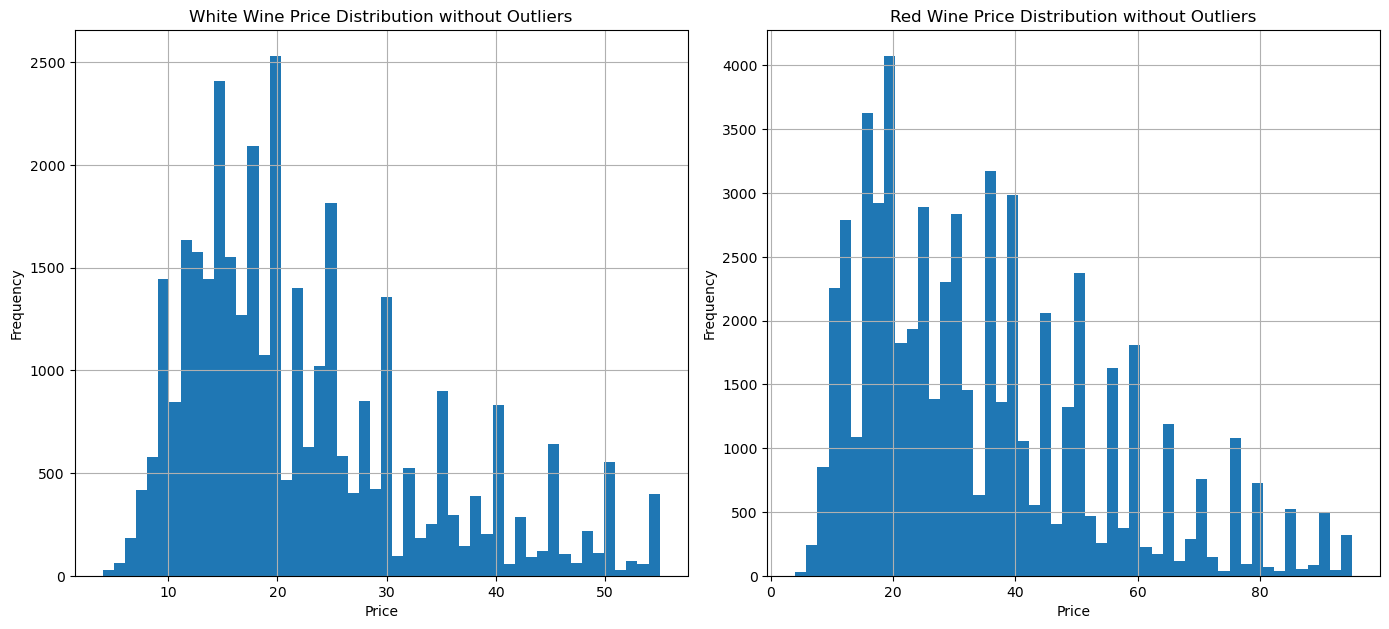

In [36]:
# Set the size of the overall figure
plt.figure(figsize=(14, 12))

# Histogram of prices without outliers for red wines
plt.subplot(2, 2, 2)  # Create a subplot in a 2x2 grid, position 2 (top-right)
df_red_without_outliers['price'].hist(bins=50)  # Plot the histogram of red wine prices with 50 bins
plt.title('Red Wine Price Distribution without Outliers')  # Set the title of the subplot
plt.xlabel('Price')  # Set the x-axis label
plt.ylabel('Frequency')  # Set the y-axis label

# Histogram of prices without outliers for white wines
plt.subplot(2, 2, 1)  # Create a subplot in a 2x2 grid, position 1 (top-left)
df_white_without_outliers['price'].hist(bins=50)  # Plot the histogram of white wine prices with 50 bins
plt.title('White Wine Price Distribution without Outliers')  # Set the title of the subplot
plt.xlabel('Price')  # Set the x-axis label
plt.ylabel('Frequency')  # Set the y-axis label

# Adjust the layout to prevent overlap
plt.tight_layout()

# Display the histograms
plt.show()

###

In [ ]:
# Select 'points' column from the two country
italy_wines = df[df['country'] == 'Italy']['points']
france_wines = df[df['country'] == 'France']['points']

# Perform independent t-test
t_stat, p_value = stats.ttest_ind(italy_wines.dropna(), france_wines.dropna(), equal_var=False)

# Print the t-statistic and p-value from the t-test
print(f"t-statistic: {t_stat}, p-value: {p_value}")

# Interpretation of the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the average rating of wines from Italy and France.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the average rating of wines from Italy and France.")

###

In [89]:
# Select 'points' column for the two type (without outliers)
red_wine_ratings = df_red_without_outliers[df_red_without_outliers['wine_type'] == 'Red']['points']
white_wine_ratings = df_white_without_outliers[df_white_without_outliers['wine_type'] == 'White']['points']

# Perform independent t-test
t_stat, p_value = stats.ttest_ind(red_wine_ratings, white_wine_ratings, equal_var=False)

# Print the t-statistic and p-value from the t-test
print(f"t-statistic: {t_stat}, p-value: {p_value}")

# Interpretation of the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the average ratings between red and white wines.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the average ratings between red and white wines.")

t-statistic: 38.33327464974308, p-value: 0.0
Reject the null hypothesis: There is a significant difference in the average ratings between red and white wines.


### 

In [90]:
# Calculate the mean rating for the two type of wine
mean_red_rating = red_wine_ratings.mean()
mean_white_rating = white_wine_ratings.mean()

# Print the mean rating for the two type of wine
print(f"Mean rating for red wines: {mean_red_rating}")
print(f"Mean rating for white wines: {mean_white_rating}")

# Interpretation of the t-test results based on the p-value
if p_value < alpha:
    print("There is a significant difference in the average ratings between red and white wines.")
else:
    print("There is no significant difference in the average ratings between red and white wines.")

Mean rating for red wines: 88.4950613336923
Mean rating for white wines: 87.7409402546523
There is a significant difference in the average ratings between red and white wines.


Even if the mean ratings are close, the large sample size and possibly low variance can lead to a statistically significant difference. The t-test assesses whether the means are different given the sample size and variance, and in this case, it indicates a significant difference despite the means being close. This is a good example of how statistical significance does not always imply practical significance.

## hypotesis 3

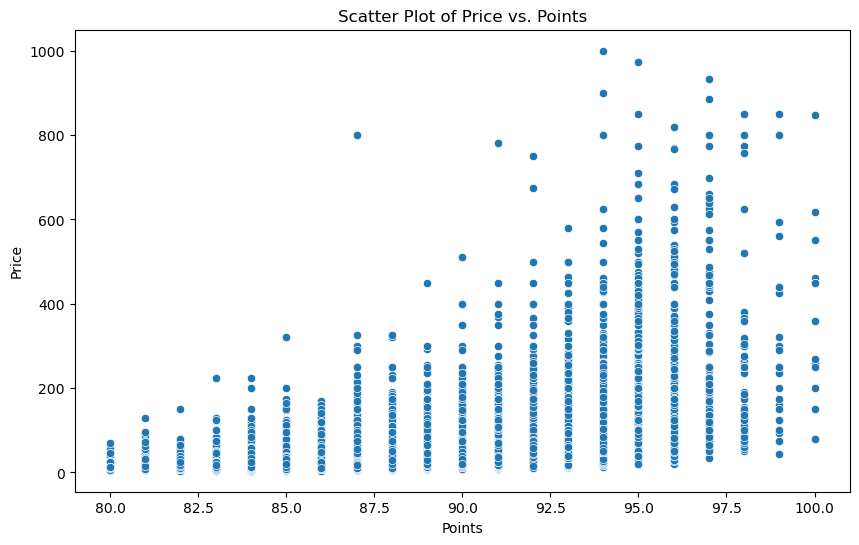

In [39]:
# Plot the scatterplot 
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='points', y='price')
plt.title('Scatter Plot of Price vs. Points')
plt.xlabel('Points')
plt.ylabel('Price')
plt.show()

### 

In [91]:
# Calculate the Pearson correlation coefficient and p-value between 'price' and 'points'
correlation, p_value = stats.pearsonr(df['price'], df['points'])

# Print the Pearson correlation coefficient and p-value
print(f"Pearson correlation coefficient: {correlation}, p-value: {p_value}")

# Interpretation of the correlation results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant correlation between the price and rating of wine.")
else:
    print("Fail to reject the null hypothesis: There is no significant correlation between the price and rating of wine.")

Pearson correlation coefficient: 0.47190271046544907, p-value: 0.0
Reject the null hypothesis: There is a significant correlation between the price and rating of wine.


### 

In [41]:
# Define a function to calculate the confidence interval for the Pearson correlation coefficient
def pearson_confidence_interval(r, n, alpha=0.05):
    r_z = np.arctanh(r)  # Fisher transformation
    se = 1 / np.sqrt(n - 3)
    z = stats.norm.ppf(1 - alpha / 2)
    ci_low = r_z - z * se
    ci_high = r_z + z * se
    return np.tanh(ci_low), np.tanh(ci_high)

# Calculate the sample size
n = len(df['price'])

# Calculate the 95% confidence interval for the Pearson correlation coefficient
ci_low, ci_high = pearson_confidence_interval(correlation, n)

# Print the 95% confidence interval
print(f"95% confidence interval for the Pearson correlation coefficient: ({ci_low}, {ci_high})")

95% confidence interval for the Pearson correlation coefficient: (0.46706934919272086, 0.47670787189686187)


# Confidence Intervals

## Sample size by country

In [42]:
# Calculate the number of rows for each country
country_sample_sizes = df.groupby('country').size().reset_index(name='Sample Size')

# Calculate the number of points rows for each country
points_sample_sizes = df.groupby('country')['points'].count().reset_index(name='Points Sample Size')

# Calculate the number of price rows for each country
price_sample_sizes = df.groupby('country')['price'].count().reset_index(name='Price Sample Size')

# Merge the tables
result = country_sample_sizes.merge(points_sample_sizes, on='country').merge(price_sample_sizes, on='country')

#Exclude countries with zero samples in points and price
result = result[(result['Points Sample Size'] > 0) & (result['Price Sample Size'] > 0)]

# Sort in descending order by the number of samples
result = result.sort_values(by='Sample Size', ascending=False)

print(result)

           country  Sample Size  Points Sample Size  Price Sample Size
37              US        48001               48001              48001
12          France        15208               15208              15208
19           Italy        12324               12324              12324
34           Spain         4581                4581               4581
7            Chile         3944                3944               3944
28        Portugal         3461                3461               3461
0        Argentina         3095                3095               3095
2        Australia         1910                1910               1910
3          Austria         1872                1872               1872
14         Germany         1777                1777               1777
26     New Zealand         1227                1227               1227
33    South Africa         1030                1030               1030
18          Israel          411                 411                411
15    

there are several countries with a sample size < 30, we discard them because otherwise the confidence intervals are not accurate enough

In [43]:
# Exclude countries  with less than 30 samples
excluded_countries = result[(result['Sample Size'] < 30)]
result = result[(result['Sample Size'] >= 30)]

print("Included Countries:")
print(result)
print("\nExcluded Countries:")
print(excluded_countries)

Included Countries:
         country  Sample Size  Points Sample Size  Price Sample Size
37            US        48001               48001              48001
12        France        15208               15208              15208
19         Italy        12324               12324              12324
34         Spain         4581                4581               4581
7          Chile         3944                3944               3944
28      Portugal         3461                3461               3461
0      Argentina         3095                3095               3095
2      Australia         1910                1910               1910
3        Austria         1872                1872               1872
14       Germany         1777                1777               1777
26   New Zealand         1227                1227               1227
33  South Africa         1030                1030               1030
18        Israel          411                 411                411
15        Gree

In [44]:
# Filter out countries with fewer than 30 points
country_counts = df['country'].value_counts()
valid_countries = country_counts[country_counts >= 30].index
excluded_countries = country_counts[country_counts < 30].index
df_filtered = df[df['country'].isin(valid_countries)]

## Wine Ratings Confidence Intervals By Country

95% Confidence Interval for the Mean Points of Wines: (88.43724009060718, 88.47596715414359)


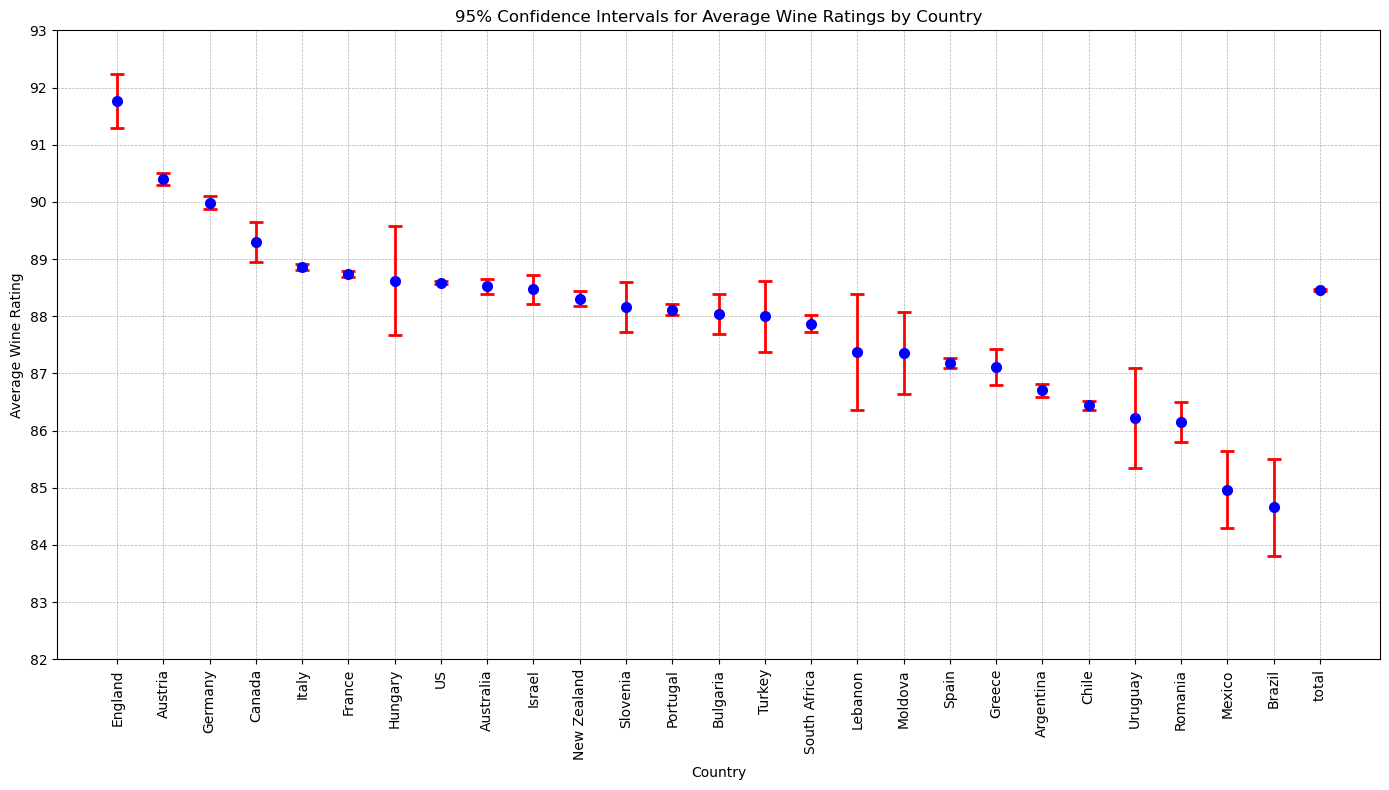

,Country,Mean,Lower CI,Upper CI
18,England,91.762712,91.292833,92.232591
9,Austria,90.399038,90.287619,90.510458
3,Germany,89.984243,89.869420,90.099066
21,Canada,89.305263,88.954780,89.655746
6,Italy,88.860273,88.811587,88.908958
2,France,88.738690,88.689661,88.787720
16,Hungary,88.619048,87.667471,89.570624
1,US,88.583696,88.555267,88.612126
8,Australia,88.521466,88.386716,88.656216
12,Israel,88.469586,88.221751,88.717422


In [45]:
# Calculate mean and standard error for the entire dataset
mean_points = df_filtered['points'].mean()
sem_points = stats.sem(df_filtered['points'].dropna())

# Calculate the confidence interval for the entire dataset
confidence_interval = stats.t.interval(0.95, len(df_filtered['points'])-1, loc=mean_points, scale=sem_points)
print(f'95% Confidence Interval for the Mean Points of Wines: {confidence_interval}')

# Calculate mean and confidence interval for each country with a minimum of 30 points
countries = df_filtered['country'].unique()
confidence_intervals = []

for country in countries:
    country_data = df[df['country'] == country]['points']
    mean = np.mean(country_data)
    confidence = stats.norm.interval(0.95, loc=mean, scale=stats.sem(country_data))
    confidence_intervals.append((country, mean, confidence[0], confidence[1]))

# Create a DataFrame for better visualization
confidence_df_points = pd.DataFrame(confidence_intervals, columns=['Country', 'Mean', 'Lower CI', 'Upper CI'])
confidence_df_points = confidence_df_points.sort_values(by='Mean', ascending=False)

# Add general confidence interval
general_row = {'Country': 'total', 'Mean': mean_points, 'Lower CI': confidence_interval[0], 'Upper CI': confidence_interval[1]}
confidence_df_points.loc[len(confidence_df_points)] = general_row

# Plotting the confidence intervals
plt.figure(figsize=(14, 8))
plt.errorbar(confidence_df_points['Country'], confidence_df_points['Mean'], 
             yerr=[confidence_df_points['Mean'] - confidence_df_points['Lower CI'], confidence_df_points['Upper CI'] - confidence_df_points['Mean']], 
             fmt='o', ecolor='r', capsize=5, elinewidth=2, markeredgewidth=2, color='blue')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Average Wine Rating')
plt.title('95% Confidence Intervals for Average Wine Ratings by Country')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.yticks(np.arange(82, 94, 1))

plt.show()
confidence_df_points

## Wine Price Confidence Intervals By Country

95% Confidence Interval for the Mean Price of Wines: (35.90882138922612, 36.36570177153682)


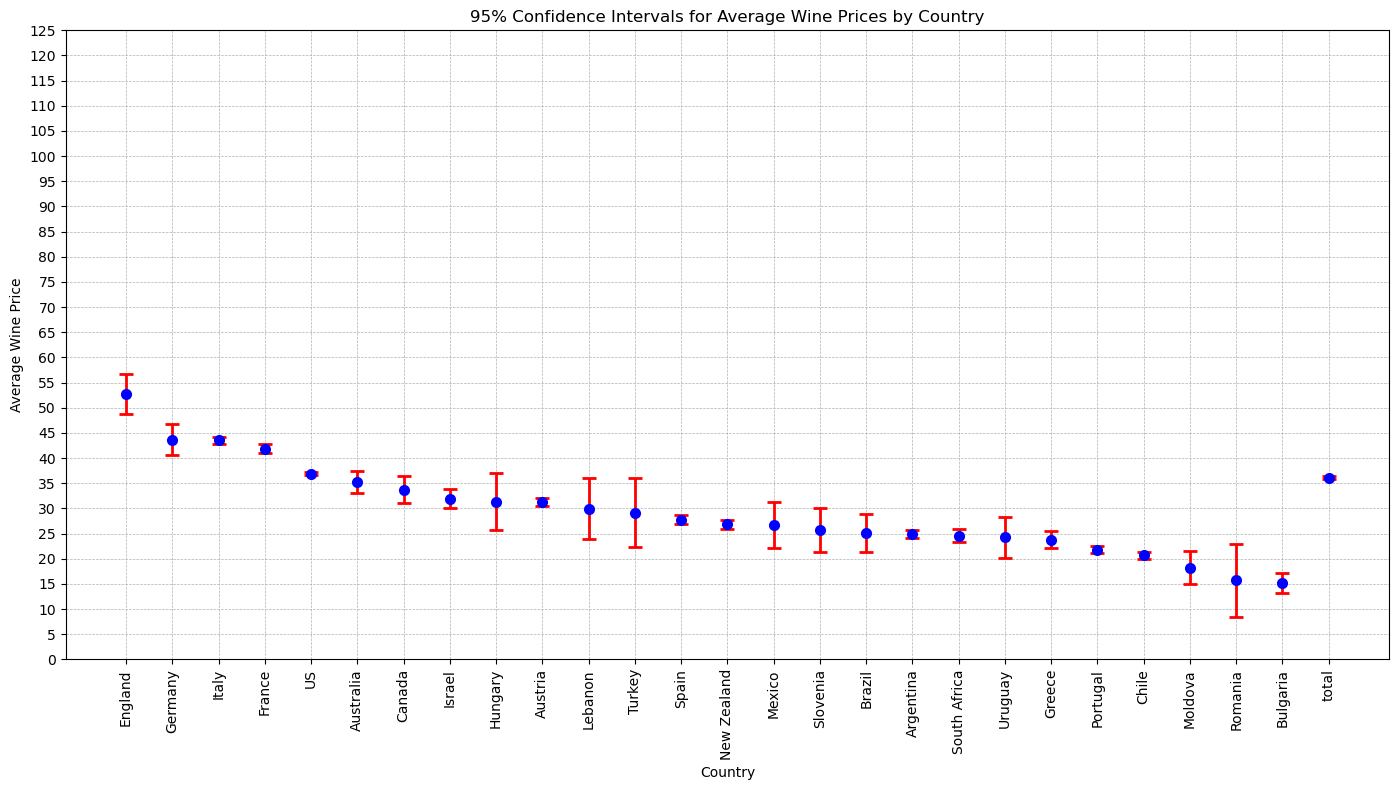

,Country,Mean,Lower CI,Upper CI
18,England,52.677966,48.745903,56.610029
3,Germany,43.631401,40.511071,46.751731
6,Italy,43.517851,42.781971,44.253732
2,France,41.882167,40.957422,42.806912
1,US,36.916398,36.680453,37.152342
8,Australia,35.253927,33.003146,37.504708
21,Canada,33.657895,30.974193,36.341597
12,Israel,31.922141,30.063918,33.780364
16,Hungary,31.333333,25.684217,36.982450
9,Austria,31.208868,30.386908,32.030827


In [46]:
# Calculate mean and standard error
mean_price = df_filtered['price'].mean()
sem_price = stats.sem(df_filtered['price'].dropna())

# Calculate the confidence interval
confidence_interval_price = stats.t.interval(0.95, len(df_filtered['price'])-1, loc=mean_price, scale=sem_price)
print(f'95% Confidence Interval for the Mean Price of Wines: {confidence_interval_price}')

# Calculate mean and confidence interval for each country
countries = df_filtered['country'].unique()
confidence_intervals_price = []

for country in countries:
    country_data = df_filtered[df_filtered['country'] == country]['price']
    mean = np.mean(country_data)
    confidence = stats.norm.interval(0.95, loc=mean, scale=stats.sem(country_data))
    confidence_intervals_price.append((country, mean, confidence[0], confidence[1]))

# Create a DataFrame for better visualization
confidence_df_price = pd.DataFrame(confidence_intervals_price, columns=['Country', 'Mean', 'Lower CI', 'Upper CI'])
confidence_df_price = confidence_df_price.sort_values(by='Mean', ascending=False)

# Add general confidence interval
general_row_price = {'Country': 'total', 'Mean': mean_price, 'Lower CI': confidence_interval_price[0], 'Upper CI': confidence_interval_price[1]}
confidence_df_price.loc[len(confidence_df_price)] = general_row_price


# Plotting the confidence intervals for 'price'
plt.figure(figsize=(14, 8))
plt.errorbar(confidence_df_price['Country'], confidence_df_price['Mean'], 
             yerr=[confidence_df_price['Mean'] - confidence_df_price['Lower CI'], confidence_df_price['Upper CI'] - confidence_df_price['Mean']], 
             fmt='o', ecolor='r', capsize=5, elinewidth=2, markeredgewidth=2, color='blue')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Average Wine Price')
plt.title('95% Confidence Intervals for Average Wine Prices by Country')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.yticks(np.arange(0, 130, 5))  # Adjust this range based on your 'price' data


plt.show()

confidence_df_price

## Price - Rating comparison with size(log)

Dataset size: 99824
95% Confidence Interval for the Mean Points of Wines: (88.43724009060718, 88.47596715414359)
95% Confidence Interval for the Mean Price of Wines: (35.90882138922612, 36.36570177153682)


C:\Users\nicol\AppData\Local\Temp\ipykernel_18556\2935971765.py:66: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\nicol\AppData\Local\Temp\ipykernel_18556\2935971765.py:76: UserWarning:

FixedFormatter should only be used together with FixedLocator



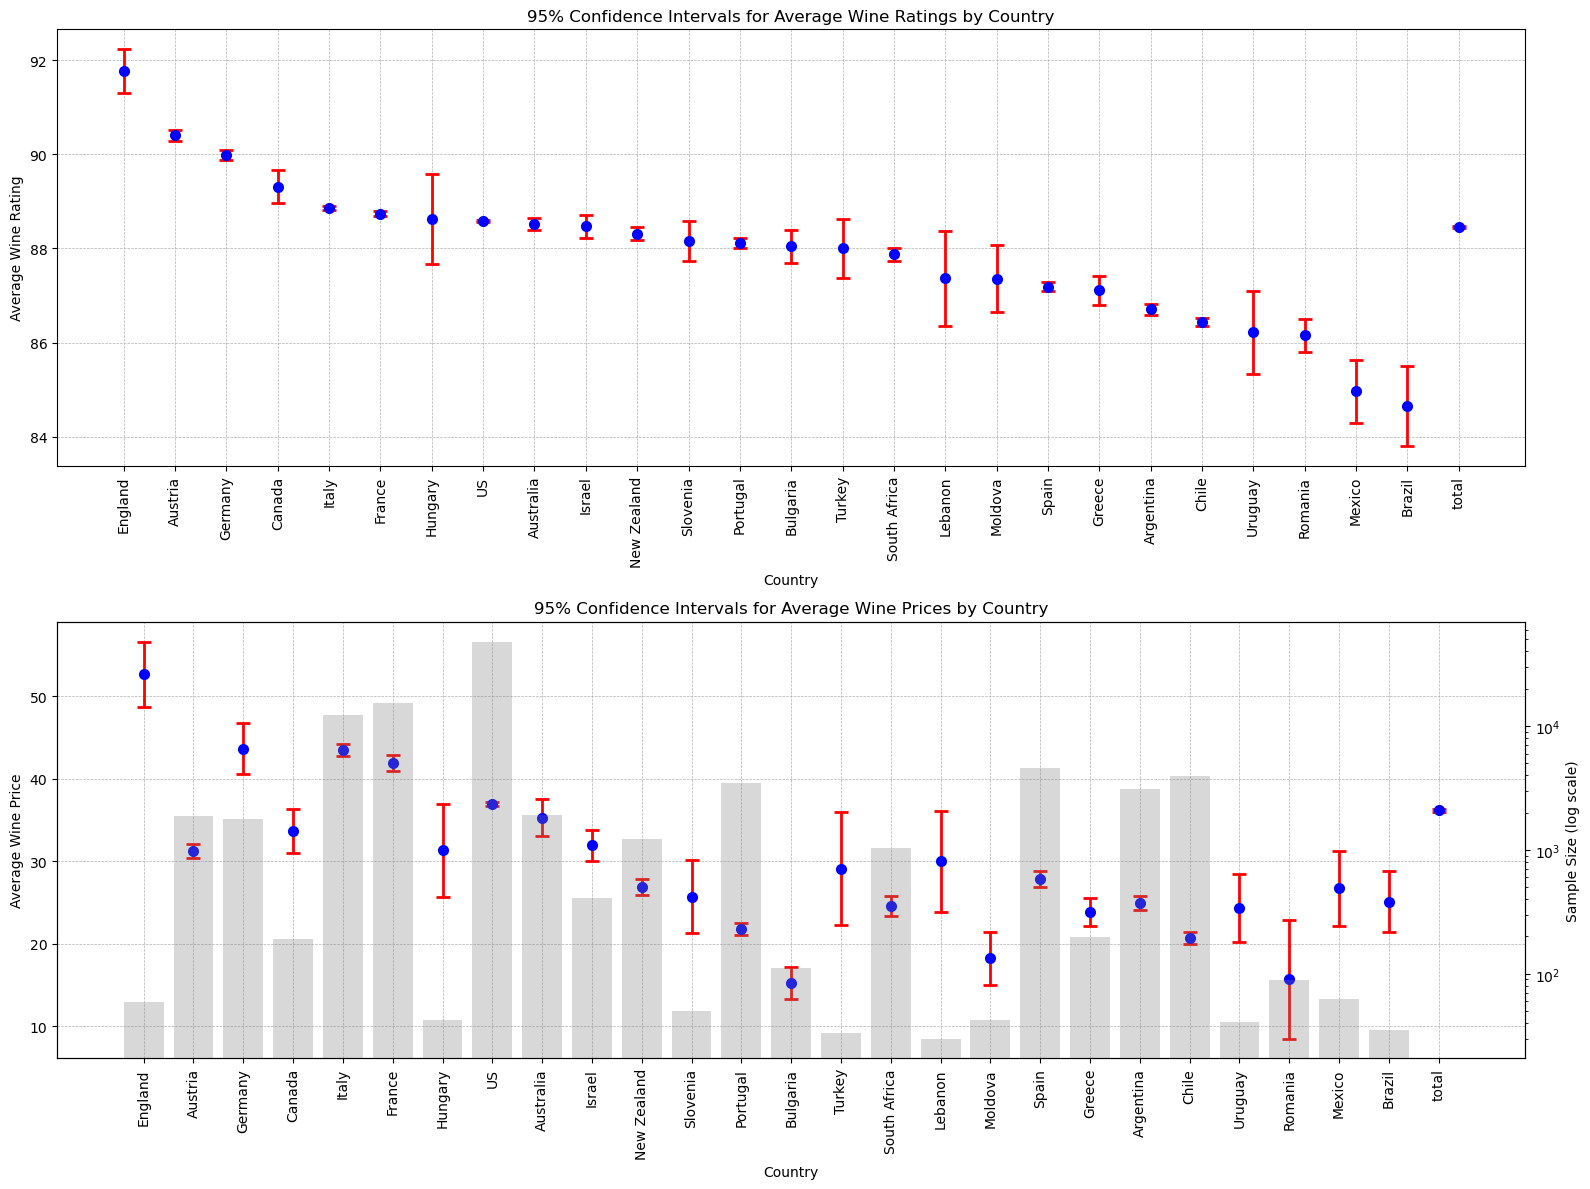

In [47]:
print(f"Dataset size: {len(df_filtered)}")

# Calculate mean and standard error for the entire dataset for 'points'
mean_points = df_filtered['points'].mean()
sem_points = stats.sem(df_filtered['points'].dropna())

# Calculate the confidence interval for the entire dataset for 'points'
confidence_interval_points = stats.t.interval(0.95, len(df_filtered['points'].dropna())-1, loc=mean_points, scale=sem_points)
print(f'95% Confidence Interval for the Mean Points of Wines: {confidence_interval_points}')

# Calculate mean and confidence interval for each country for 'points'
countries = df_filtered['country'].unique()
confidence_intervals_points = []

for country in countries:
    country_data = df_filtered[df_filtered['country'] == country]['points']
    mean = np.mean(country_data)
    confidence = stats.norm.interval(0.95, loc=mean, scale=stats.sem(country_data))
    confidence_intervals_points.append((country, mean, confidence[0], confidence[1]))

# Create a DataFrame for better visualization
confidence_df_points = pd.DataFrame(confidence_intervals_points, columns=['Country', 'Mean', 'Lower CI', 'Upper CI'])
confidence_df_points = confidence_df_points.sort_values(by='Mean', ascending=False)

# Append the total statistics to the country data for 'points'
general_row_points = {'Country': 'total', 'Mean': mean_points, 'Lower CI': confidence_interval_points[0], 'Upper CI': confidence_interval_points[1]}
confidence_df_points.loc[len(confidence_df_points)] = general_row_points

# Calculate mean and standard error for the entire dataset for 'price'
mean_price = df_filtered['price'].mean()
sem_price = stats.sem(df_filtered['price'].dropna())

# Calculate the confidence interval for the entire dataset for 'price'
confidence_interval_price = stats.t.interval(0.95, len(df_filtered['price'].dropna())-1, loc=mean_price, scale=sem_price)
print(f'95% Confidence Interval for the Mean Price of Wines: {confidence_interval_price}')

# Calculate mean and confidence interval for each country for 'price'
confidence_intervals_price = []

for country in countries:
    country_data = df_filtered[df_filtered['country'] == country]['price']
    mean = np.mean(country_data)
    confidence = stats.norm.interval(0.95, loc=mean, scale=stats.sem(country_data))
    confidence_intervals_price.append((country, mean, confidence[0], confidence[1]))

# Create a DataFrame for better visualization
confidence_df_price = pd.DataFrame(confidence_intervals_price, columns=['Country', 'Mean', 'Lower CI', 'Upper CI'])

# Align the order of countries in 'confidence_df_price' to match 'confidence_df_points'
confidence_df_price = confidence_df_price.set_index('Country').reindex(confidence_df_points['Country']).reset_index()

# Append the total statistics to the country data for 'price'
general_row_price = {'Country': 'total', 'Mean': mean_price, 'Lower CI': confidence_interval_price[0], 'Upper CI': confidence_interval_price[1]}
confidence_df_price.loc[len(confidence_df_price)] = general_row_price

# Calculate the sample size for each country
sample_sizes = df['country'].value_counts().reindex(confidence_df_price['Country']).fillna(0)

# Plotting the confidence intervals for both wine ratings and prices side by side
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))

# Plot for wine ratings
ax1.errorbar(confidence_df_points['Country'], confidence_df_points['Mean'], 
             yerr=[confidence_df_points['Mean'] - confidence_df_points['Lower CI'], confidence_df_points['Upper CI'] - confidence_df_points['Mean']], 
             fmt='o', ecolor='r', capsize=5, elinewidth=2, markeredgewidth=2, color='blue')
ax1.set_xticklabels(confidence_df_points['Country'], rotation=90)
ax1.set_xlabel('Country')
ax1.set_ylabel('Average Wine Rating')
ax1.set_title('95% Confidence Intervals for Average Wine Ratings by Country')
ax1.grid(True, linestyle='--', linewidth=0.5)

# Plot for wine prices with histogram for sample sizes
ax2.errorbar(confidence_df_price['Country'], confidence_df_price['Mean'], 
             yerr=[confidence_df_price['Mean'] - confidence_df_price['Lower CI'], confidence_df_price['Upper CI'] - confidence_df_price['Mean']], 
             fmt='o', ecolor='r', capsize=5, elinewidth=2, markeredgewidth=2, color='blue')
ax2.set_xticklabels(confidence_df_price['Country'], rotation=90)
ax2.set_xlabel('Country')
ax2.set_ylabel('Average Wine Price')
ax2.set_title('95% Confidence Intervals for Average Wine Prices by Country')
ax2.grid(True, linestyle='--', linewidth=0.5)

# Secondary y-axis for sample sizes histogram with log scale
ax3 = ax2.twinx()
ax3.bar(confidence_df_price['Country'], sample_sizes, alpha=0.3, color='grey')
ax3.set_ylabel('Sample Size (log scale)')
ax3.set_yscale('log')

plt.tight_layout()
plt.show()

## guardarci dietro

95% Confidence Interval for the Mean Points of Wines: (88.4353489865457, 88.47405484382912)


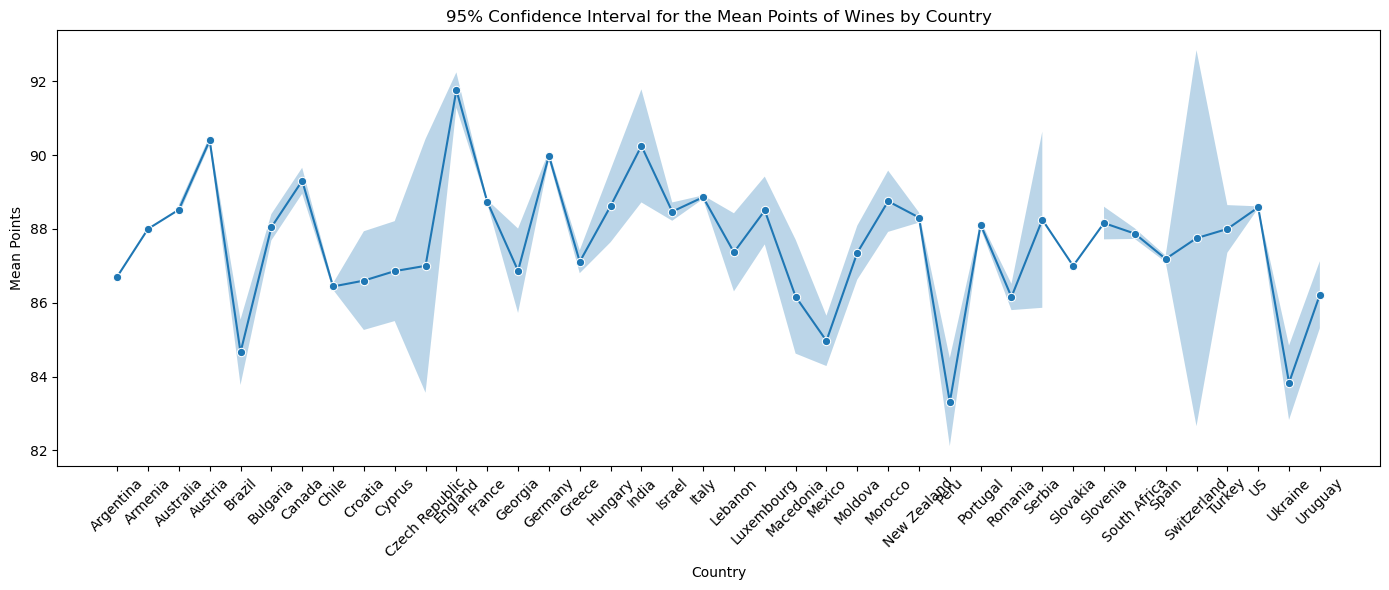

In [95]:
# Calculate mean and standard error
mean_points = df['points'].mean()
sem_points = stats.sem(df['points'].dropna())

# Calculate the confidence interval
confidence_interval = stats.t.interval(0.95, len(df['points'])-1, loc=mean_points, scale=sem_points)
print(f'95% Confidence Interval for the Mean Points of Wines: {confidence_interval}')

# Create a more detailed DataFrame for plotting
df_grouped = df.groupby('country').agg(mean_points=('points', 'mean'),
                                       count=('points', 'size')).reset_index()
df_grouped['sem_points'] = df.groupby('country')['points'].sem().values

# Calculate confidence intervals for each country
confidence_intervals = df_grouped.apply(lambda row: stats.t.interval(0.95, row['count']-1, 
                                                                    loc=row['mean_points'], 
                                                                    scale=row['sem_points']), axis=1)
df_grouped['ci_lower'] = confidence_intervals.apply(lambda x: x[0])
df_grouped['ci_upper'] = confidence_intervals.apply(lambda x: x[1])

# Improved line plot with 95% confidence interval
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_grouped, x='country', y='mean_points', marker='o')
plt.fill_between(df_grouped['country'], df_grouped['ci_lower'], df_grouped['ci_upper'], alpha=0.3)

plt.xlabel('Country')
plt.ylabel('Mean Points')
plt.title('95% Confidence Interval for the Mean Points of Wines by Country')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [49]:
# Calculate mean and standard error
mean_points = df['points'].mean()
sem_points = stats.sem(df['points'].dropna())

# Calculate the confidence interval
confidence_interval = stats.t.interval(0.95, len(df['points'].dropna())-1, loc=mean_points, scale=sem_points)
print(f'95% Confidence Interval for the Mean Points of Wines: {confidence_interval}')

95% Confidence Interval for the Mean Points of Wines: (88.4353489865457, 88.47405484382912)


In [50]:
# Calculate mean and standard error
mean_price = df['price'].mean()
sem_price = stats.sem(df['price'].dropna())

# Calculate the confidence interval
confidence_interval = stats.t.interval(0.95, len(df['price'].dropna())-1, loc=mean_price, scale=sem_price)
print(f'95% Confidence Interval for the Mean Price of Wines: {confidence_interval}')

95% Confidence Interval for the Mean Price of Wines: (35.890728008954746, 36.34721951851228)


# Linear Regression and correlation analysis

## Scatterplots and Correlation

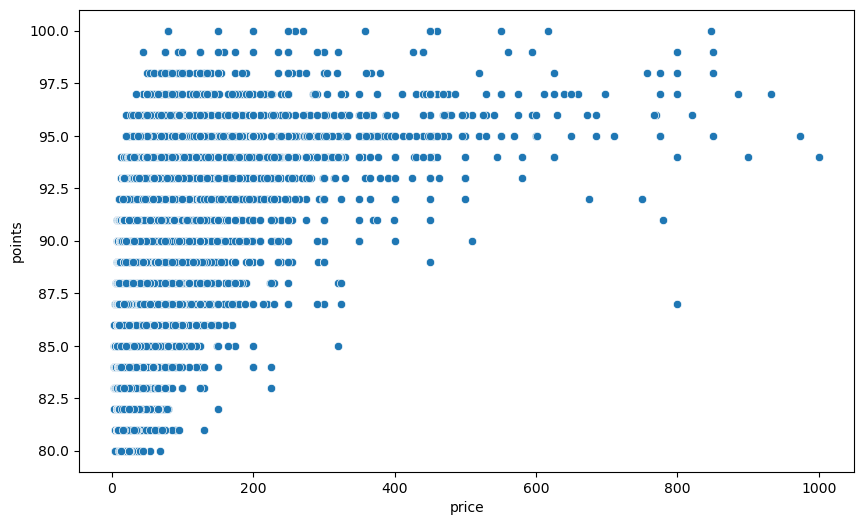

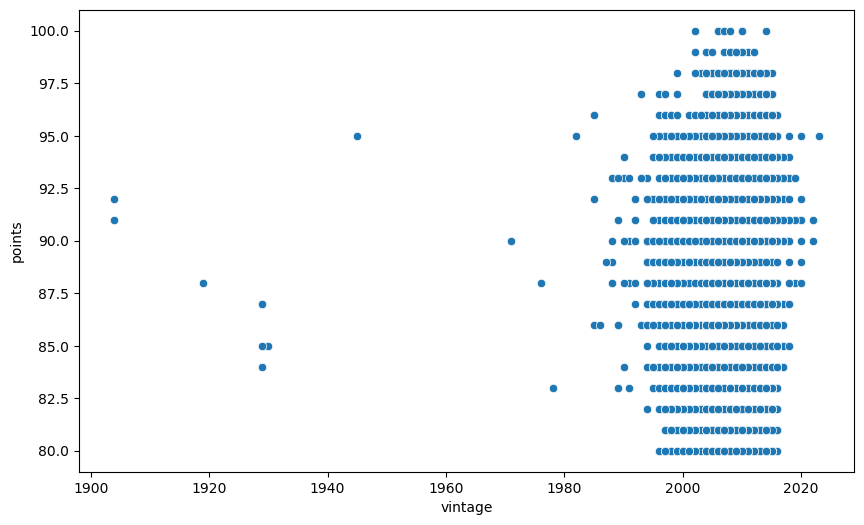

In [51]:
for i in ['price', 'vintage']:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=i, y="points")
    plt.show()

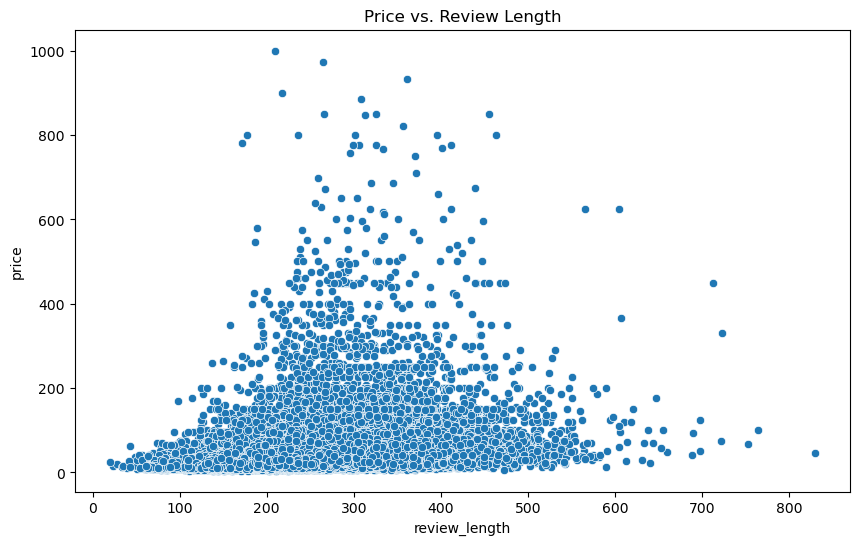

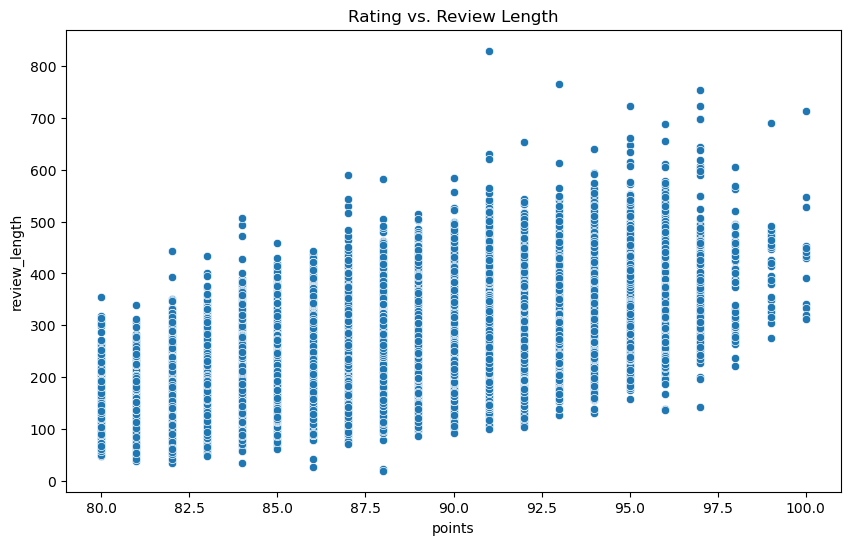

In [52]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='review_length', y='price', data=df)
plt.title('Price vs. Review Length')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='points', y='review_length', data=df)
plt.title('Rating vs. Review Length')
plt.show()

<Figure size 1000x600 with 0 Axes>

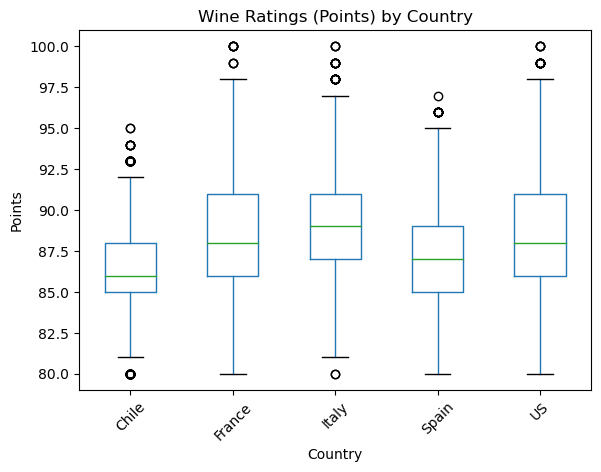

In [53]:
# Select top 10 countries by the number of wine reviews
top_countries = df['country'].value_counts().head(5).index
top_countries_data = df[df['country'].isin(top_countries)]

# Box plot for points by country
plt.figure(figsize=(10, 6))
top_countries_data.boxplot(column='points', by='country', grid=False)
plt.title('Wine Ratings (Points) by Country')
plt.suptitle('')
plt.xlabel('Country')
plt.ylabel('Points')
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x800 with 0 Axes>

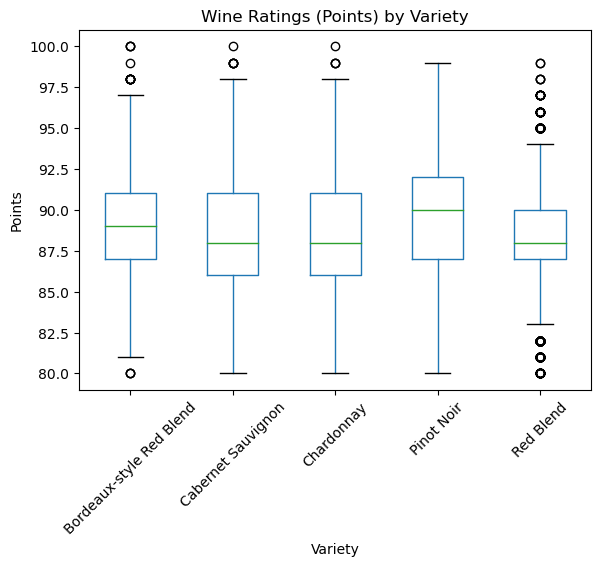

In [54]:
# Select top 10 varieties by the number of wine reviews
top_varieties = df['variety'].value_counts().head(5).index
top_varieties_data = df[df['variety'].isin(top_varieties)]

# Box plot for points by variety
plt.figure(figsize=(12, 8))
top_varieties_data.boxplot(column='points', by='variety', grid=False)
plt.title('Wine Ratings (Points) by Variety')
plt.suptitle('')
plt.xlabel('Variety')
plt.ylabel('Points')
plt.xticks(rotation=45)
plt.show()

Index(['points', 'price', 'vintage', 'review_length', 'country_Chile',
       'country_France', 'country_Italy', 'country_Spain', 'country_US',
       'variety_Bordeaux-style Red Blend', 'variety_Cabernet Sauvignon',
       'variety_Chardonnay', 'variety_Pinot Noir', 'variety_Red Blend'],
      dtype='object')
points                                int64
price                               float64
vintage                               Int64
review_length                         int64
country_Chile                          bool
country_France                         bool
country_Italy                          bool
country_Spain                          bool
country_US                             bool
variety_Bordeaux-style Red Blend       bool
variety_Cabernet Sauvignon             bool
variety_Chardonnay                     bool
variety_Pinot Noir                     bool
variety_Red Blend                      bool
dtype: object


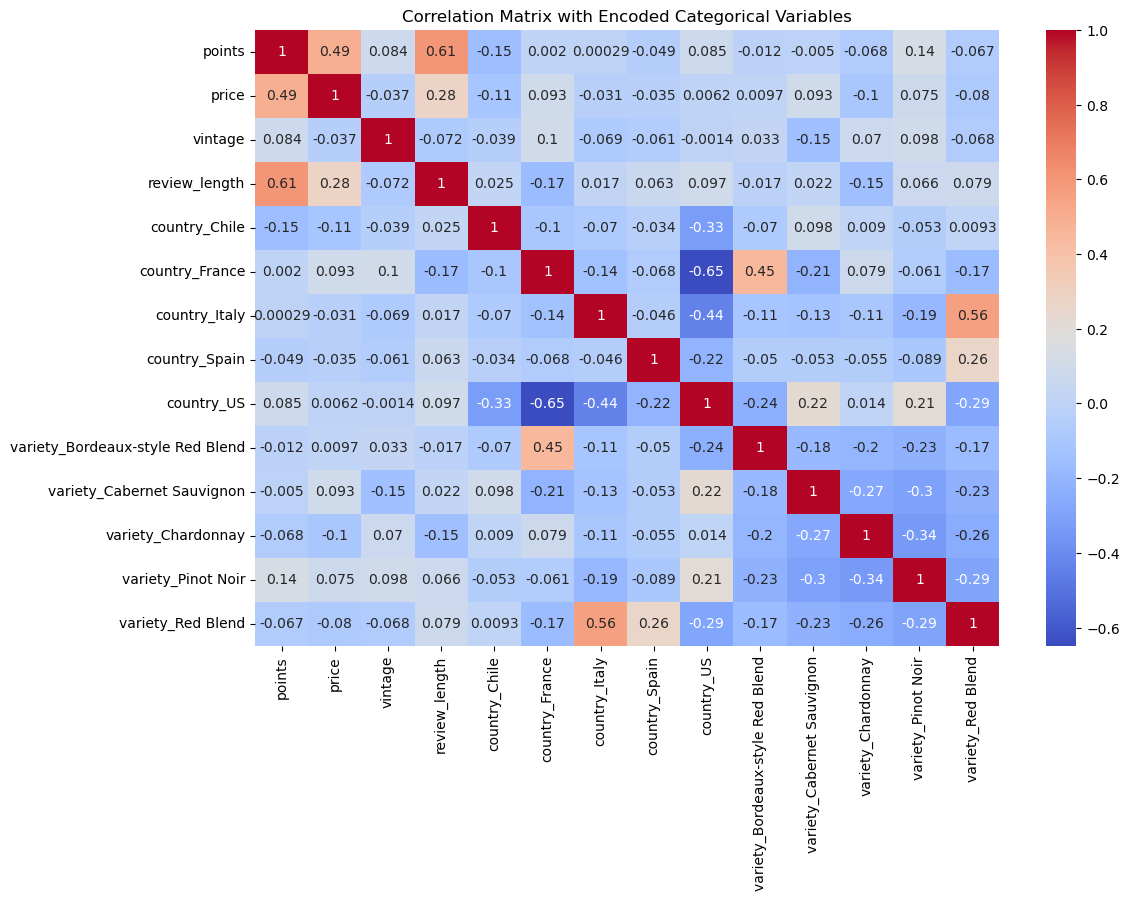

In [55]:
filtered_df = df[df['country'].isin(top_countries) & df['variety'].isin(top_varieties)]
columns_to_drop = ['description', 'designation', 'region_1', 'province', 'region_2', 'title', 'winery', 'price_category', 'is_outlier', 'wine_type']
filtered_df = filtered_df.drop(columns=columns_to_drop)

numerical_columns = ['price', 'points']
categorical_columns = ['country', 'variety']


# Se desideri calcolare la matrice di correlazione includendo le variabili categoriche,
# potresti voler utilizzare la codifica one-hot per le variabili categoriche

# Creazione di un dataframe codificato
encoded_df = pd.get_dummies(filtered_df, columns=categorical_columns)

# Assicurarsi che tutte le colonne siano numeriche
encoded_df = encoded_df.fillna(0)
encoded_df = encoded_df.astype(int)

# Verifica delle colonne codificate e dei loro tipi di dati
print(encoded_df.columns)
print(encoded_df.dtypes)

# Calcolare la matrice di correlazione per il dataframe codificato
encoded_correlation_matrix = encoded_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(encoded_correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix with Encoded Categorical Variables')
plt.show()

## Simple Linear Regression 


predict that the country is Italy using the variety Red Blend

price = b_0 + b_1 * points


In [56]:
y = df['points']
x1 = df['review_length']

# Calcolo delle statistiche necessarie
my = y.mean()
sy = y.std()
n = len(y)
mx1 = x1.mean()
sx1 = x1.std()

# Calcolo del coefficiente di correlazione
num1 = ((x1 - mx1) * (y - my)).sum() / (n - 1)
den1 = sx1 * sy
R_variety = num1 / den1

print("Linear correlation coefficient between points and review length = ", R_variety)

Linear correlation coefficient between Price and Points =  0.5870808552593478


In [57]:
x_name = 'review_length'
x = df[x_name].copy()
mx = x.mean()
sx = x.std()
R = encoded_correlation_matrix.loc[x_name, 'points']
b1 = sy/sx*R
b0 = my-b1*mx
n = 42  
print(f"Points = {b0} + {b1} * Review length \nR^2 = {R**2}")

Points = 81.61465640701464 + 0.027951847845181385 * Review length 
R^2 = 0.3678073004389196


In [58]:
x = df[[x_name]].copy() # in statsmodel the intercept is modeled by adding a constant explanatory variable
x['intercept'] = 1
mod = sm.OLS(y, x) #OLS stands for ordinary least squares

fitted_mod = mod.fit()
print(fitted_mod.summary())

                            OLS Regression Results                            
Dep. Variable:                 points   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                 5.256e+04
Date:                Mon, 03 Jun 2024   Prob (F-statistic):               0.00
Time:                        19:04:18   Log-Likelihood:            -2.3445e+05
No. Observations:               99938   AIC:                         4.689e+05
Df Residuals:                   99936   BIC:                         4.689e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
review_length     0.0271      0.000    229.259

We want to predict the price with a wine with 80 points

In [ ]:
x0 = 80
y80 = b0+b1*x0
print("out model", y80)

# using statsmodel
y80st = fitted_mod.predict([80,1])
print("statsmodel", y80st)

In [ ]:
n= len(df)
Sres = np.sqrt(fitted_mod.mse_resid)
mx = encoded_df.review_length.mean()
SSx = (encoded_df.review_length**2).sum()
SE = Sres*np.sqrt(1+1/n+(x0-mx)**2/SSx)
alpha = 0.05
e = SE*stats.t.ppf(1-alpha/2,n-2)
print("Prediction interval for the points when review length is 80 char: [",y80-e , ", ", y80+e,"]")

In [ ]:
predictions = fitted_mod.predict(x)
plt.figure(figsize=(10, 6))
plt.scatter(x['review_length'], y, color='blue', label='Actual Points')
plt.plot(x['review_length'], predictions, color='red', label='Predicted Line')
plt.xlabel('Review Length')
plt.ylabel('Points')
plt.title('Review Length vs Points with Regression Line')
plt.legend()
plt.show()

# Residuals vs Fitted Values
residuals = y - predictions
plt.figure(figsize=(10, 6))
plt.scatter(x['review_length'], residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Review Length')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [ ]:
y = encoded_df['points']

# Variabili indipendenti (x)
expl_var = [c for c in encoded_df.columns if c != 'points']
x = encoded_df[expl_var].copy()  # Copia delle variabili esplicative
x['intercept'] = 1  # Aggiungi una costante per l'intercetta

# Allineare gli indici di y e x
y = y.loc[x.index]

# Eseguire la regressione OLS
mod = sm.OLS(y, x)
fitted_mod = mod.fit()

# Stampare il sommario del modello
print(fitted_mod.summary())

In [ ]:
# step 1

for v in expl_var:
    
    x = encoded_df[[v]].copy()
    x['intercept'] = 1
    mod = sm.OLS(y, x) #OLS stands for ordinary least squares

    fitted_mod = mod.fit()
    print("Adjusted R2 using ", v, ": ", fitted_mod.rsquared_adj)

The maximum value of the adjusted R2 is obtained using variable price. 
Let's now try to add a further variable. 

In [ ]:
# step 2

expl_var_chosen = ['price'] 
expl_var_left = [c  for c in expl_var if c!= 'price'] 

for v in expl_var_left:
    expl_var = expl_var_chosen+[v]

    x = encoded_df[expl_var].copy()
    x['intercept'] = 1
    mod = sm.OLS(y, x) #OLS stands for ordinary least squares

    fitted_mod = mod.fit()
    print("Adjusted R2 adding ", v, ": ", fitted_mod.rsquared_adj)

The adjusted R2 improves if we add the explanatory variable review_length.


In [ ]:
# step 3

expl_var_chosen = expl_var_chosen+['review_length'] 
expl_var_left = [c  for c in expl_var_left if c!= 'review_length'] 

for v in expl_var_left:
    expl_var = expl_var_chosen+[v]

    x = encoded_df[expl_var].copy()
    x['intercept'] = 1
    mod = sm.OLS(y, x) #OLS stands for ordinary least squares

    fitted_mod = mod.fit()
    print("Adjusted R2 adding ", v, ": ", fitted_mod.rsquared_adj)

The adjusted R2 improves if we add the explanatory variable country_Chile

In [ ]:
# step 4

expl_var_chosen = expl_var_chosen+['country_Chile'] 
expl_var_left = [c  for c in expl_var_left if c!= 'country_Chile'] 

for v in expl_var_left:
    expl_var = expl_var_chosen+[v]

    x = encoded_df[expl_var].copy()
    x['intercept'] = 1
    mod = sm.OLS(y, x) #OLS stands for ordinary least squares

    fitted_mod = mod.fit()
    print("Adjusted R2 adding ", v, ": ", fitted_mod.rsquared_adj)

The adjusted R2 improves if we add the explanatory variable variety_Red Blend

In [ ]:
# step 5

expl_var_chosen = expl_var_chosen+['variety_Red Blend'] 
expl_var_left = [c  for c in expl_var_left if c!= 'variety_Red Blend'] 

for v in expl_var_left:
    expl_var = expl_var_chosen+[v]

    x = encoded_df[expl_var].copy()
    x['intercept'] = 1
    mod = sm.OLS(y, x) #OLS stands for ordinary least squares

    fitted_mod = mod.fit()
    print("Adjusted R2 adding ", v, ": ", fitted_mod.rsquared_adj)

In all cases the adjusted R2 decreases, so there is no advantage in adding further variables. The optimal model is the one using the price, review_length, country_Chile and variety_Red Blend.

In [ ]:
expl_var = ['price', 'review_length', 'country_Chile', 'variety_Red Blend'] 

x = encoded_df[expl_var].copy()
x['constant'] = 1
mod = sm.OLS(y, x) #OLS stands for ordinary least squares

fitted_mod = mod.fit()
print(fitted_mod.summary())

The above result, describes the following linear regression model

$\text{points} = 81.9932 + 0.0251\cdot\text{price} + 0.0239\cdot\text{review length} - 1.9568\cdot\text{country Chile} - 0.6856\cdot\text{variety Red Blend}$


In [ ]:
predictions = fitted_mod.predict(x)
plt.figure(figsize=(10, 6))
plt.scatter(x = x['review_length'],y = y)
plt.scatter(x['review_length'],predictions, c = 'black')
plt.title('regression predictions')
plt.show()

# Calcolare i residui
residuals = y - predictions

# Scatter plot dei residui
plt.figure(figsize=(10, 6))
plt.scatter(x['review_length'], residuals, label='Residuals', alpha=0.6)
plt.axhline(0, color='r', linestyle='--', linewidth=2, label='Zero Line')
plt.title('Residual Plot')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
residuals.hist()

In [ ]:
# Fit a normal distribution to the residuals:
# mean and standard deviation
mu, std = stats.norm.fit(residuals)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF
xmin, xmax = plt.xlim()
x_range = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x_range, mu, std)

plt.plot(x_range, p, 'k', linewidth=2)
title = "Fit Values: {:.2f} and {:.2f}".format(mu, std)
plt.title(title)
plt.show()

# Making predictions with new data
# Aggiungi tutte le variabili utilizzate nel modello originale
new_data = pd.DataFrame({
    'price': [20],
    'review_length': [100],
    'country_Chile': [0],  # Aggiungi altre variabili con valori appropriati
    'variety_Red Blend': [0]
})
new_data['intercept'] = 1

# Assicurati che l'ordine delle colonne corrisponda a quello del modello
new_data = new_data[['intercept', 'price', 'review_length', 'country_Chile', 'variety_Red Blend']]

# Predict
predictions = fitted_mod.get_prediction(new_data)
pred_summary = predictions.summary_frame(alpha=0.05)  # 95% prediction interval
print(pred_summary)

# Conclusions